# INTERNATIONAL STUDENT VISA IN COVID-19 PRERIOD FROM 2020-2022

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
!pip install --upgrade openpyxl


# I. COMMENCING OVERSEAS STUDENTS

In [6]:
total_level_course = pd.read_excel('Commencing_all_oversea.xlsx')
total_level_course.head()

,Level of Course,TOTAL Commencing -2020,TOTAL Commencing -2021,TOTAL Commencing-2022,TOTAL-All-2020,TOTAL-All-2021,TOTAL-All-2022
0,Doctorate by Research,3966,4540,5793,21596,20990,23472
1,Doctorate by Coursework,70,77,59,103,111,93
2,Master's (Extended),442,625,600,1557,2143,2216
3,Master's by Research,951,736,738,2158,2186,2000
4,Master's by Coursework,77252,56581,77779,190471,158239,153433


In [7]:

# Data for commencing overseas students
filtered_total_level_course = total_level_course[total_level_course['Level of Course'] != 'TOTAL']

# Top 5 levels of course in each year
top_5_levels_commencing_2020 = filtered_total_level_course.nlargest(5, 'TOTAL Commencing -2020')['Level of Course']
top_5_levels_commencing_2021 = filtered_total_level_course.nlargest(5, 'TOTAL Commencing -2021')['Level of Course']
top_5_levels_commencing_2022 = filtered_total_level_course.nlargest(5, 'TOTAL Commencing-2022')['Level of Course']

# Other levels of course (not in top 5) in each year
other_levels_commencing_2020 = filtered_total_level_course[~filtered_total_level_course['Level of Course'].isin(top_5_levels_commencing_2020)]
other_levels_commencing_2021 = filtered_total_level_course[~filtered_total_level_course['Level of Course'].isin(top_5_levels_commencing_2021)]
other_levels_commencing_2022 = filtered_total_level_course[~filtered_total_level_course['Level of Course'].isin(top_5_levels_commencing_2022)]

# Calculate the sum of levels of course not in the top 5 for each year
sum_other_levels_commencing_2020 = other_levels_commencing_2020['TOTAL Commencing -2020'].sum()
sum_other_levels_commencing_2021 = other_levels_commencing_2021['TOTAL Commencing -2021'].sum()
sum_other_levels_commencing_2022 = other_levels_commencing_2022['TOTAL Commencing-2022'].sum()



In [8]:
# Find the value of the 'TOTAL' row in each column
total_2020_value = total_level_course.loc[total_level_course['Level of Course'] == 'TOTAL', 'TOTAL Commencing -2020'].values[0]
total_2021_value = total_level_course.loc[total_level_course['Level of Course'] == 'TOTAL', 'TOTAL Commencing -2021'].values[0]
total_2022_value = total_level_course.loc[total_level_course['Level of Course'] == 'TOTAL', 'TOTAL Commencing-2022'].values[0]

# Create DataFrame for total values
commencing_total_values_df = pd.DataFrame({
    'Level of Course': ['Total'],
    'TOTAL Commencing -2020': [total_2020_value],
    'TOTAL Commencing -2021': [total_2021_value],
    'TOTAL Commencing-2022': [total_2022_value]
})



In [9]:
# Create DataFrames for top 5 levels of courses for each year with corresponding values
commencing_df_2020 = pd.DataFrame({'Level of Course': top_5_levels_commencing_2020, 'TOTAL Commencing -2020': total_level_course.loc[total_level_course['Level of Course'].isin(top_5_levels_commencing_2020), 'TOTAL Commencing -2020']})
commencing_df_2021 = pd.DataFrame({'Level of Course': top_5_levels_commencing_2021, 'TOTAL Commencing -2021': total_level_course.loc[total_level_course['Level of Course'].isin(top_5_levels_commencing_2021), 'TOTAL Commencing -2021']})
commencing_df_2022 = pd.DataFrame({'Level of Course': top_5_levels_commencing_2022, 'TOTAL Commencing-2022': total_level_course.loc[total_level_course['Level of Course'].isin(top_5_levels_commencing_2022), 'TOTAL Commencing-2022']})

# Merge DataFrames for each year on 'Level of Course'
commencing_df = commencing_df_2020.merge(commencing_df_2021, on='Level of Course', how='outer').merge(commencing_df_2022, on='Level of Course', how='outer')

# Create a DataFrame for the sums of other levels of courses for each year
commencing_sum_other_df = pd.DataFrame({
    'Level of Course': ['Other'],
    'TOTAL Commencing -2020': [sum_other_levels_commencing_2020],
    'TOTAL Commencing -2021': [sum_other_levels_commencing_2021],
    'TOTAL Commencing-2022': [sum_other_levels_commencing_2022]
})

# Concatenate the sum_other_df and total_df with the existing DataFrame (df)
commencing_df = pd.concat([commencing_df, commencing_sum_other_df, commencing_total_values_df])

# Reset the index of the DataFrame
commencing_df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
commencing_df



,Level of Course,TOTAL Commencing -2020,TOTAL Commencing -2021,TOTAL Commencing-2022
0,Bachelor's Honours,6988.0,6205.0,6244.0
1,Bachelor's Pass,72763.0,65507.0,74461.0
2,Diploma (AQF),12337.0,9672.0,13055.0
3,Doctorate by Research,NaN,4540.0,5793.0
4,Master's by Coursework,77252.0,56581.0,77779.0
5,Non-award courses,6896.0,NaN,NaN
6,Other,15304.0,11570.0,15875.0
7,Total,191540.0,154075.0,193207.0


In [10]:
# Find the values for 'Doctorate by Research' and 'Non-award courses'
doctorate_by_research_2020 = total_level_course.loc[total_level_course['Level of Course'] == 'Doctorate by Research', 'TOTAL Commencing -2020'].values[0]
non_award_courses_2021 = total_level_course.loc[total_level_course['Level of Course'] == 'Non-award courses', 'TOTAL Commencing -2021'].values[0]
non_award_courses_2022 = total_level_course.loc[total_level_course['Level of Course'] == 'Non-award courses', 'TOTAL Commencing-2022'].values[0]

# Fill missing values for 'Doctorate by Research' in 2020
commencing_df.loc[commencing_df['Level of Course'] == 'Doctorate by Research', 'TOTAL Commencing -2020'] = commencing_df.loc[commencing_df['Level of Course'] == 'Doctorate by Research', 'TOTAL Commencing -2020'].fillna(doctorate_by_research_2020)

# Fill missing values for 'Non-award courses' in 2021
commencing_df.loc[commencing_df['Level of Course'] == 'Non-award courses', 'TOTAL Commencing -2021'] = commencing_df.loc[commencing_df['Level of Course'] == 'Non-award courses', 'TOTAL Commencing -2021'].fillna(non_award_courses_2021)

# Fill missing values for 'Non-award courses' in 2022
commencing_df.loc[commencing_df['Level of Course'] == 'Non-award courses', 'TOTAL Commencing-2022'] = commencing_df.loc[commencing_df['Level of Course'] == 'Non-award courses', 'TOTAL Commencing-2022'].fillna(non_award_courses_2022)

print('Top 6 Level of Course')
# Display the updated DataFrame
commencing_df


Top 6 Level of Course


,Level of Course,TOTAL Commencing -2020,TOTAL Commencing -2021,TOTAL Commencing-2022
0,Bachelor's Honours,6988.0,6205.0,6244.0
1,Bachelor's Pass,72763.0,65507.0,74461.0
2,Diploma (AQF),12337.0,9672.0,13055.0
3,Doctorate by Research,3966.0,4540.0,5793.0
4,Master's by Coursework,77252.0,56581.0,77779.0
5,Non-award courses,6896.0,2351.0,5373.0
6,Other,15304.0,11570.0,15875.0
7,Total,191540.0,154075.0,193207.0


In [11]:
#Data for all overseas students

filtered_all_overseas = total_level_course[total_level_course['Level of Course'] != 'TOTAL']

# Top 5 levels of course in each year
top_5_all_overseas_2020 = filtered_all_overseas.nlargest(5, 'TOTAL-All-2020')['Level of Course']
top_5_all_overseas_2021 = filtered_all_overseas.nlargest(5, 'TOTAL-All-2021')['Level of Course']
top_5_all_overseas_2022 = filtered_all_overseas.nlargest(5, 'TOTAL-All-2022')['Level of Course']

# Other levels of course (not in top 5) in each year
other_all_overseas_2020 = filtered_all_overseas[~filtered_all_overseas['Level of Course'].isin(top_5_all_overseas_2020)]
other_all_overseas_2021 = filtered_all_overseas[~filtered_all_overseas['Level of Course'].isin(top_5_all_overseas_2021)]
other_all_overseas_2022 = filtered_all_overseas[~filtered_all_overseas['Level of Course'].isin(top_5_all_overseas_2022)]

# Calculate the sum of levels of course not in the top 5 for each year
sum_other_all_overseas_2020 = other_all_overseas_2020['TOTAL-All-2020'].sum()
sum_other_all_overseas_2021 = other_all_overseas_2021['TOTAL-All-2021'].sum()
sum_other_all_overseas_2022 = other_all_overseas_2022['TOTAL-All-2022'].sum()


In [12]:
# Find the value of the 'TOTAL' row in each column
overseas_total_2020= total_level_course.loc[total_level_course['Level of Course'] == 'TOTAL', 'TOTAL-All-2020'].values[0]
overseas_total_2021 = total_level_course.loc[total_level_course['Level of Course'] == 'TOTAL', 'TOTAL-All-2021'].values[0]
overseas_total_2022 = total_level_course.loc[total_level_course['Level of Course'] == 'TOTAL', 'TOTAL-All-2022'].values[0]

# Create DataFrame for total values
overseas_total_values_df = pd.DataFrame({
    'Level of Course': ['Total'],
    'TOTAL-All-2020': [overseas_total_2020],
    'TOTAL-All-2021': [overseas_total_2021],
    'TOTAL-All-2022': [overseas_total_2022]
})


In [13]:
# Create DataFrames for top 5 levels of courses for each year with corresponding values
overseas_df_2020 = pd.DataFrame({'Level of Course': top_5_all_overseas_2020, 'TOTAL-All-2020': total_level_course.loc[total_level_course['Level of Course'].isin(top_5_all_overseas_2020), 'TOTAL-All-2020']})
overseas_df_2021 = pd.DataFrame({'Level of Course': top_5_all_overseas_2021, 'TOTAL-All-2021': total_level_course.loc[total_level_course['Level of Course'].isin(top_5_all_overseas_2021), 'TOTAL-All-2021']})
overseas_df_2022 = pd.DataFrame({'Level of Course': top_5_all_overseas_2022, 'TOTAL-All-2022': total_level_course.loc[total_level_course['Level of Course'].isin(top_5_all_overseas_2022), 'TOTAL-All-2022']})

# Merge DataFrames for each year on 'Level of Course'
oversea_df = overseas_df_2020.merge(overseas_df_2021, on='Level of Course', how='outer').merge(overseas_df_2022, on='Level of Course', how='outer')

# Create a DataFrame for the sums of other levels of courses for each year
oversea_sum_other_df = pd.DataFrame({
    'Level of Course': ['Other'],
    'TOTAL-All-2020': [sum_other_all_overseas_2020],
    'TOTAL-All-2021': [sum_other_all_overseas_2021],
    'TOTAL-All-2022': [sum_other_all_overseas_2022]
})

# Concatenate the sum_other_df and total_df with the existing DataFrame (df)
oversea_df = pd.concat([oversea_df, oversea_sum_other_df, overseas_total_values_df])

# Reset the index of the DataFrame
oversea_df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
oversea_df

,Level of Course,TOTAL-All-2020,TOTAL-All-2021,TOTAL-All-2022
0,Bachelor's Honours,27775,26275,24181
1,Bachelor's Pass,203339,200231,206671
2,Diploma (AQF),20423,16082,18415
3,Doctorate by Research,21596,20990,23472
4,Master's by Coursework,190471,158239,153433
5,Other,25630,18492,22470
6,Total,489234,440309,448642


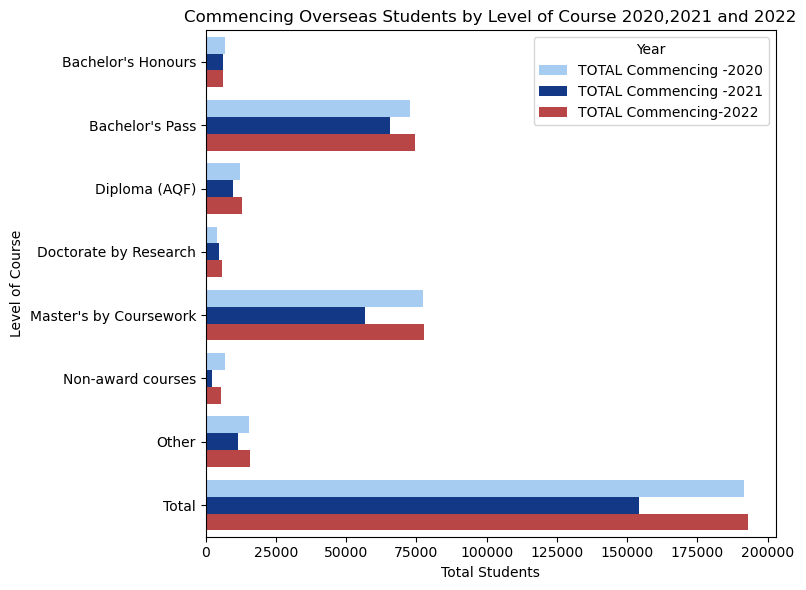

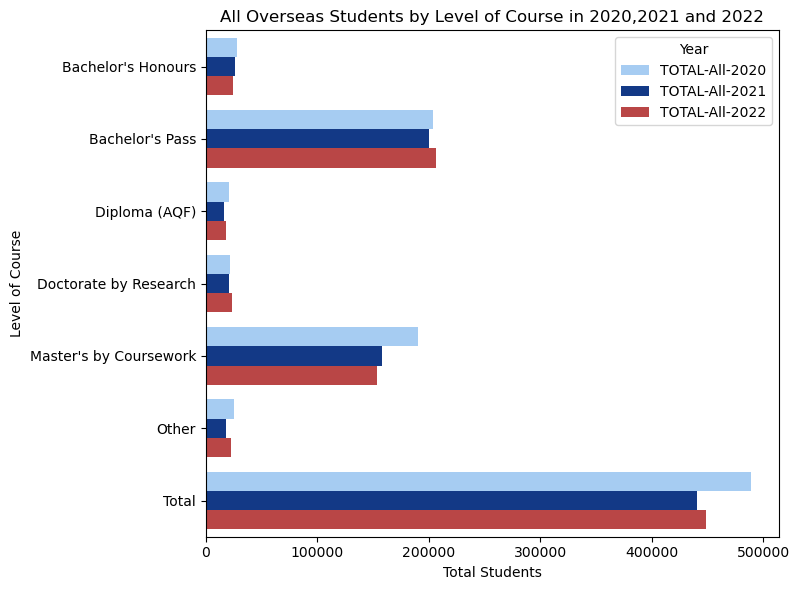

In [14]:
commencing_df_melted = commencing_df.melt(id_vars='Level of Course', var_name='Year', value_name='Total Students')
# Define custom colors for each year
colors = {'TOTAL Commencing -2020': '#99CCFF', 'TOTAL Commencing -2021': '#003399', 'TOTAL Commencing-2022': '#CC3333'}

# Plotting the grouped bar charts using Seaborn
plt.figure(figsize=(14, 6))
# Plot for commencing overseas students
plt.subplot(1, 2, 1)
sns.barplot(data=commencing_df_melted, x='Total Students', y='Level of Course', hue='Year', palette=colors)
plt.title('Commencing Overseas Students by Level of Course 2020,2021 and 2022')
plt.xlabel('Total Students')
plt.ylabel('Level of Course')
plt.legend(title='Year')

# Show plot
plt.tight_layout()
plt.show()
oversea_df_melted = oversea_df.melt(id_vars='Level of Course', var_name='Year', value_name='Total Students')
# Define custom colors for each year
colors = {'TOTAL-All-2020': '#99CCFF', 'TOTAL-All-2021': '#003399', 'TOTAL-All-2022': '#CC3333'}
# Plotting the grouped bar charts using Seaborn
plt.figure(figsize=(14, 6))

# Plot for commencing overseas students
plt.subplot(1, 2, 1)
sns.barplot(data=oversea_df_melted, x='Total Students', y='Level of Course', hue='Year', palette=colors)
plt.title('All Overseas Students by Level of Course in 2020,2021 and 2022')
plt.xlabel('Total Students')
plt.ylabel('Level of Course')
plt.legend(title='Year')

# Show plot
plt.tight_layout()
plt.show()

<p> Based on 2 plots: Commencing Overseas Students and All Overseas Students, which are similar, only in Bachelor and Master are different. In "Bachelor of Commening", the student visa in 2021 went down at 65000 rather than 2020 and 2022 approximately 75000, compared to "All Overseas Students", it was similar around 200000 from 2020 to 2022. 

# II. BOARD OF FIELD EDUCATION


In [15]:
field_education = pd.read_excel('Board field of education.xlsx')

In [16]:
commencing_field = field_education.drop(columns=['Total'])
commencing_field

,Broad Field of Education,Natural and Physical Sciences,Information Technology,Engineering and Related Technologies,Architecture and Building,"Agriculture, Environmental and Related Studies",Health,Education,Management and Commerce,Society and Culture,Creative Arts,"Food, Hospitality and Personal Services",Mixed Field Programs,Non-award courses
0,Total-Commencing-2020,46735,47623,34742,15418,9924,105773,54340,146146,139065,39559,209,10745,13872
1,Total-Commencing-2021,47990,43558,32419,14962,7089,108070,56897,125765,133303,38239,196,8218,8589
2,Total-Commencing-2022,45051,52099,34127,14811,7558,102966,50851,133069,122095,34943,205,6889,11065


In [17]:
commencing_field ['Broad Field of Education']

0    Total-Commencing-2020
1    Total-Commencing-2021
2    Total-Commencing-2022
Name: Broad Field of Education, dtype: object

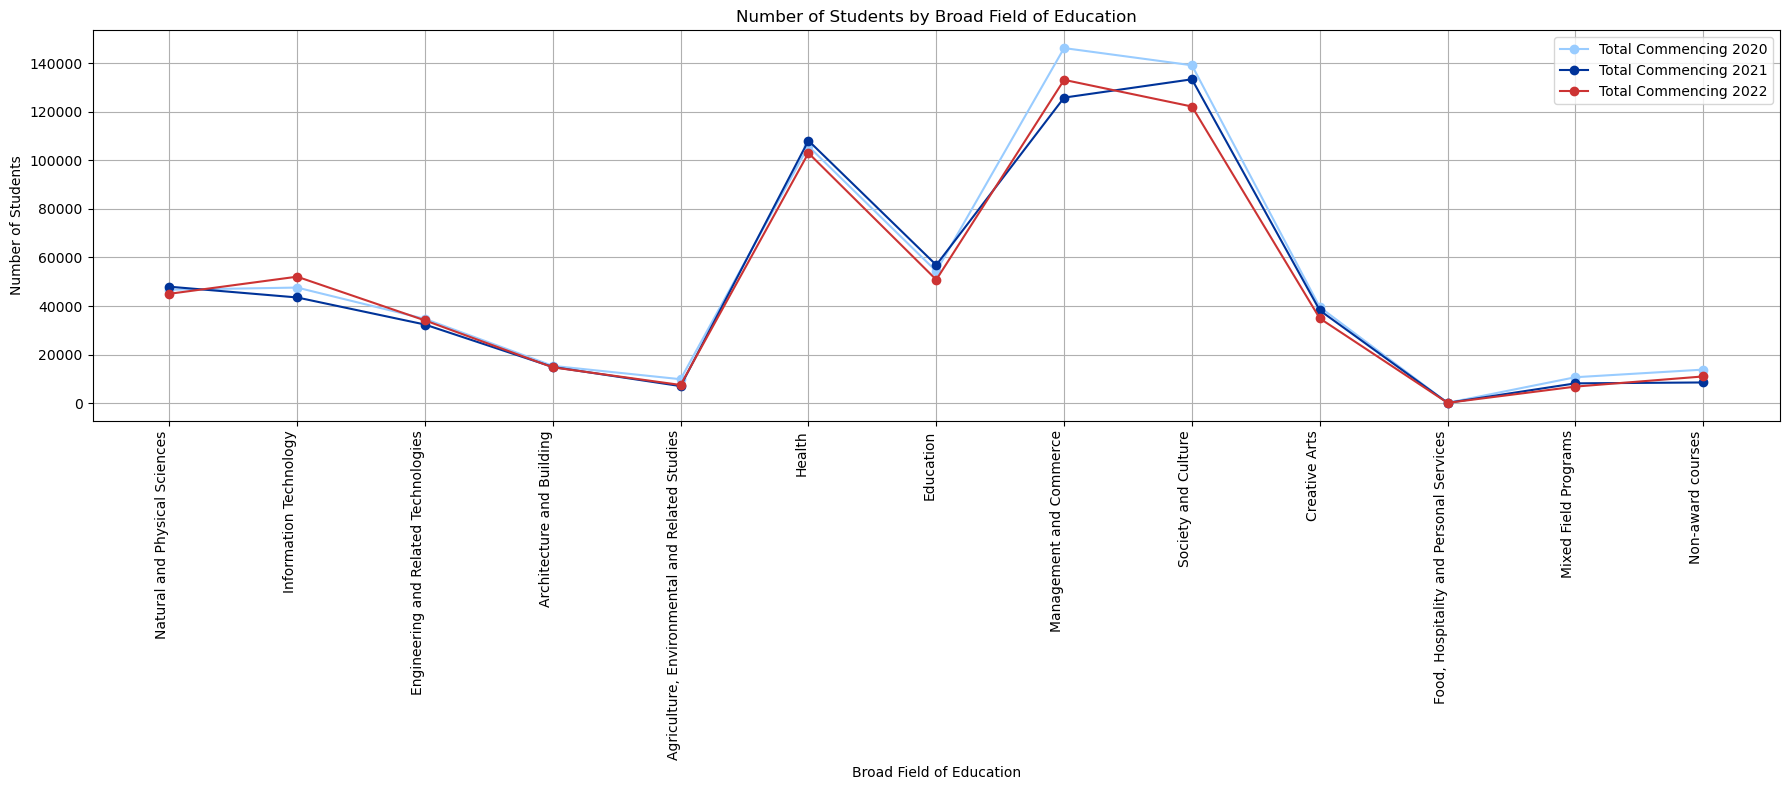

In [18]:
# Filter the DataFrame to get the rows corresponding to the total commencing students for each year
total_commencing_2020 = commencing_field[commencing_field['Broad Field of Education'] == 'Total-Commencing-2020'].values[0][1:]
total_commencing_2021 = commencing_field[commencing_field['Broad Field of Education'] == 'Total-Commencing-2021'].values[0][1:]
total_commencing_2022 = commencing_field[commencing_field['Broad Field of Education'] == 'Total-Commencing-2022'].values[0][1:]

# Define education fields
education_fields = ['Natural and Physical Sciences', 'Information Technology', 'Engineering and Related Technologies',
                    'Architecture and Building', 'Agriculture, Environmental and Related Studies', 'Health',
                    'Education', 'Management and Commerce', 'Society and Culture', 'Creative Arts',
                    'Food, Hospitality and Personal Services', 'Mixed Field Programs', 'Non-award courses']

# Combine total commencing students for each year into a list
total_students = [total_commencing_2020, total_commencing_2021, total_commencing_2022]

colors = ['#99CCFF', '#003399', '#CC3333']

# Create the line chart
plt.figure(figsize=(18, 8))
for i, year in enumerate(range(2020, 2023)):
    plt.plot(education_fields, total_students[i], marker='o', color=colors[i], label=f'Total Commencing {year}')

# Customize the chart
plt.title('Number of Students by Broad Field of Education')
plt.xlabel('Broad Field of Education')
plt.ylabel('Number of Students')
plt.xticks(rotation=90, ha='right') 
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()




<h3>Overall Insight:</h3>
<url>
    <li> The line chart depicts the number of students commencing in various fields of education over the years 2020, 2021, and 2022.
    <li> In 2021, the COVID-19 pandemic significantly impacted student enrollment in several fields. Notably, the number of students in "Management and Commerce," "Society and Culture," and "Information Technology" decreased substantially. However, most other fields showed relatively stable numbers during this period.
    <li> With the pandemic subsiding in 2022, the number of students in "Management and Commerce" and "Information Technology" saw a sharp increase, reversing the previous year's decline. In contrast, the "Society and Culture" field experienced a notable drop in student numbers, from around 140,000 in 2021 to 120,000 in 2022.
    <li> The data for 2022 reveals that "Management and Commerce" had the highest enrollment, with up to 145,000 students. "Society and Culture" followed closely with exactly 140,000 students, while "Health" had more than 100,000 students. The "Education" field had around 60,000 students, and both "Information Technology" and "Natural and Physical Sciences" had around 50,000 students each.


# III. INTERNATIONAL STUDENT VISAS IN EACH AREA

In [19]:
birth_gender = pd.read_excel('Birth and Gender.xlsx')

In [20]:
# Replace any value '<5' with 3
birth_gender.replace('< 5', 3, inplace=True)

/var/folders/gp/s31h1xy530vff43m73j0bczm0000gn/T/ipykernel_31692/894246231.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  birth_gender.replace('< 5', 3, inplace=True)


In [21]:
birth_gender = birth_gender[birth_gender != 'np'].dropna()

In [22]:
birth_gender['Total-2021'] = birth_gender['Total-2021'].astype(int)
birth_gender['Total-2022'] = birth_gender['Total-2022'].astype(int)


In [23]:
birth_gender.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 0 to 162
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Area        162 non-null    object
 1   Country     162 non-null    object
 2   Total 2020  162 non-null    int64 
 3   Total-2021  162 non-null    int64 
 4   Total-2022  162 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.6+ KB


In [24]:
birth_gender['Area'].unique()

array(['Australia', 'Oceania and Antarctica', 'North-West Europe',
       'Southern and Eastern Europe', 'North Africa and the Middle East',
       'South-East Asia', 'North-East Asia', 'Southern and Central Asia',
       'Americas', 'Sub-Saharan Africa', 'No Information'], dtype=object)

In [25]:
# Initialize variables
Sub_Saharan_Africa_total_2020 = 0
Southern_and_Eastern_Europe_total_2020 = 0
North_Africa_and_the_Middle_East_total_2020 = 0
Americas_total_2020 = 0
North_West_Europe_total_2020 = 0
Oceania_and_Antarctica_total_2020 = 0
Southern_and_Central_Asia_total_2020 = 0
South_East_Asia_total_2020 = 0
North_East_Asia_total_2020 = 0
Australia_total_2020 = 0
No_Information_total_2020 = 0
Other_total_2020 = 0

# Loop through data and categorize areas in 2020
for i in range(len(birth_gender)):
    area = birth_gender.iloc[i]['Area']
    total_2020 = birth_gender.iloc[i]['Total 2020'] 
    if area == 'Sub-Saharan Africa':
        Sub_Saharan_Africa_total_2020 += total_2020
    elif area == 'Southern and Eastern Europe':
        Southern_and_Eastern_Europe_total_2020 += total_2020
    elif area == 'North Africa and the Middle East':
        North_Africa_and_the_Middle_East_total_2020 += total_2020
    elif area == 'Americas':
        Americas_total_2020 += total_2020
    elif area == 'North-West Europe':
        North_West_Europe_total_2020 += total_2020
    elif area == 'Oceania and Antarctica':
        Oceania_and_Antarctica_total_2020 += total_2020
    elif area == 'Southern and Central Asia':
        Southern_and_Central_Asia_total_2020 += total_2020
    elif area == 'South-East Asia':
        South_East_Asia_total_2020 += total_2020
    elif area == 'North-East Asia':
        North_East_Asia_total_2020 += total_2020
    elif area == 'Australia':
        Australia_total_2020 += total_2020
    elif area == 'No Information':
        No_Information_total_2020 += total_2020
    else:
        Other_total_2020 += total_2020

# Calculate the total for each area
area_totals_2020 = birth_gender.groupby('Area')['Total 2020'].sum()

# Sort the areas based on their totals
sorted_areas_2020 = area_totals_2020.sort_values(ascending=False)

# Take the top four areas
top_three_areas_2020 = sorted_areas_2020.head(3)

# Sum the totals of the top four areas
top_three_total_2020 = top_three_areas_2020.sum()

# Calculate the total for the "Other" category
other_total_2020 = area_totals_2020.sum() - top_three_total_2020


# Initialize variables
Sub_Saharan_Africa_total_2021 = 0
Southern_and_Eastern_Europe_total_2021 = 0
North_Africa_and_the_Middle_East_total_2021 = 0
Americas_total_2021 = 0
North_West_Europe_total_2021 = 0
Oceania_and_Antarctica_total_2021 = 0
Southern_and_Central_Asia_total_2021 = 0
South_East_Asia_total_2021 = 0
North_East_Asia_total_2021 = 0
Australia_total_2021 = 0
No_Information_total_2021 = 0
Other_total_2021 = 0

# Loop through data and categorize areas in 2021
for i in range(len(birth_gender)):
    area = birth_gender.iloc[i]['Area']
    total_2021 = birth_gender.iloc[i]['Total-2021'] 
    if area == 'Sub-Saharan Africa':
        Sub_Saharan_Africa_total_2021 += total_2021
    elif area == 'Southern and Eastern Europe':
        Southern_and_Eastern_Europe_total_2021 += total_2021
    elif area == 'North Africa and the Middle East':
        North_Africa_and_the_Middle_East_total_2021 += total_2021
    elif area == 'Americas':
        Americas_total_2021 += total_2021
    elif area == 'North-West Europe':
        North_West_Europe_total_2021 += total_2021
    elif area == 'Oceania and Antarctica':
        Oceania_and_Antarctica_total_2021 += total_2021
    elif area == 'Southern and Central Asia':
        Southern_and_Central_Asia_total_2021 += total_2021
    elif area == 'South-East Asia':
        South_East_Asia_total_2021 += total_2021
    elif area == 'North-East Asia':
        North_East_Asia_total_2021 += total_2021
    elif area == 'Australia':
        Australia_total_2021 += total_2021
    elif area == 'No Information':
        No_Information_total_2021 += total_2021
    else:
        Other_total_2021 += total_2021

# Calculate the total for each area
area_totals_2021 = birth_gender.groupby('Area')['Total-2021'].sum()

# Sort the areas based on their totals
sorted_areas_2021 = area_totals_2021.sort_values(ascending=False)

# Take the top four areas
top_three_areas_2021 = sorted_areas_2021.head(3)

# Sum the totals of the top four areas
top_three_total_2021 = top_three_areas_2021.sum()

# Calculate the total for the "Other" category
other_total_2021 = area_totals_2021.sum() - top_three_total_2021

# Initialize variables
Sub_Saharan_Africa_total_2022 = 0
Southern_and_Eastern_Europe_total_2022 = 0
North_Africa_and_the_Middle_East_total_2022 = 0
Americas_total_2022 = 0
North_West_Europe_total_2022 = 0
Oceania_and_Antarctica_total_2022 = 0
Southern_and_Central_Asia_total_2022 = 0
South_East_Asia_total_2022 = 0
North_East_Asia_total_2022 = 0
Australia_total_2022 = 0
No_Information_total_2022 = 0
Other_total_2022 = 0

# Loop through data and categorize areas
for i in range(len(birth_gender)):
    area = birth_gender.iloc[i]['Area']
    total_2022 = birth_gender.iloc[i]['Total-2022'] 
    if area == 'Sub-Saharan Africa':
        Sub_Saharan_Africa_total_2022 += total_2022
    elif area == 'Southern and Eastern Europe':
        Southern_and_Eastern_Europe_total_2022 += total_2022
    elif area == 'North Africa and the Middle East':
        North_Africa_and_the_Middle_East_total_2022 += total_2022
    elif area == 'Americas':
        Americas_total_2022 += total_2022
    elif area == 'North-West Europe':
        North_West_Europe_total_2022 += total_2022
    elif area == 'Oceania and Antarctica':
        Oceania_and_Antarctica_total_2022 += total_2022
    elif area == 'Southern and Central Asia':
        Southern_and_Central_Asia_total_2022 += total_2022
    elif area == 'South-East Asia':
        South_East_Asia_total_2022 += total_2022
    elif area == 'North-East Asia':
        North_East_Asia_total_2022 += total_2022
    elif area == 'Australia':
        Australia_total_2022 += total_2022
    elif area == 'No Information':
        No_Information_total_2022 += total_2022
    else:
        Other_total_2022 += total_2022

# Calculate the total for each area
area_totals_2022 = birth_gender.groupby('Area')['Total-2022'].sum()

# Sort the areas based on their totals
sorted_areas_2022 = area_totals_2022.sort_values(ascending=False)

# Take the top four areas
top_three_areas_2022 = sorted_areas_2022.head(3)

# Sum the totals of the top four areas
top_three_total_2022 = top_three_areas_2022.sum()

# Calculate the total for the "Other" category
other_total_2022 = area_totals_2022.sum() - top_three_total_2022


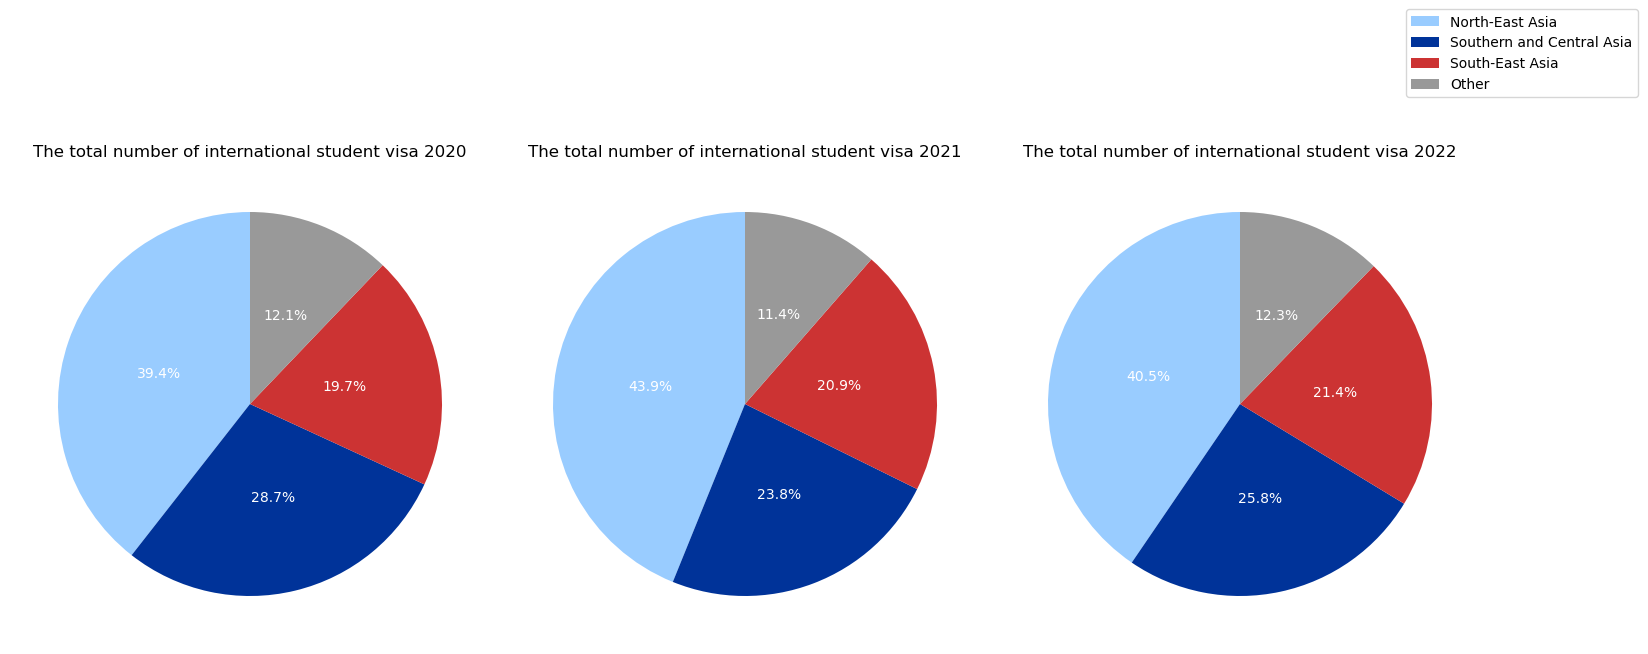

In [26]:
# Data for 2020
labels_2020 = list(top_three_areas_2020.index) + ['Other']
sizes_2020 = list(top_three_areas_2020.values) + [other_total_2020]

# Data for 2021
labels_2021 = list(top_three_areas_2021.index) + ['Other']
sizes_2021 = list(top_three_areas_2021.values) + [other_total_2021]

# Data for 2022
labels_2022 = list(top_three_areas_2022.index) + ['Other']
sizes_2022 = list(top_three_areas_2022.values) + [other_total_2022]

# Define a colormap with enough colors for all countries
colors = ['#99CCFF', '#003399', '#CC3333','#999999']

# Create subplots for each year
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

# Plot pie chart for 2020
axs[0].pie(sizes_2020, autopct='%1.1f%%', startangle=90, colors=colors, labeldistance=None, pctdistance=0.5, textprops={'color': 'white'})
axs[0].set_title('The total number of international student visa 2020')

# Plot pie chart for 2021
axs[1].pie(sizes_2021, autopct='%1.1f%%', startangle=90, colors=colors, labeldistance=None, pctdistance=0.5, textprops={'color': 'white'})
axs[1].set_title('The total number of international student visa 2021')

# Plot pie chart for 2022
axs[2].pie(sizes_2022, autopct='%1.1f%%', startangle=90, colors=colors, labeldistance=None, pctdistance=0.5, textprops={'color': 'white'})
axs[2].set_title('The total number of international student visa 2022')

# Create a legend for all subplots
fig.legend(labels_2020, loc='lower right', bbox_to_anchor=(1.1, 1))


# Show the plot
plt.tight_layout()
plt.show()



In [27]:
#create data frame for top 3 areas in 2020, 2021 and 2022.
# Create the DataFrame
top3_area = pd.DataFrame({
    'Area': top_three_areas_2020.index,
    'Total 2020': top_three_areas_2020.values,
    'Total 2021': top_three_areas_2021.values,
    'Total 2022': top_three_areas_2022.values
})

# Add the 'Other' row to the DataFrame
top3_area.loc[len(top3_area)] = ['Other', other_total_2020, other_total_2021, other_total_2022]

top3_area



,Area,Total 2020,Total 2021,Total 2022
0,North-East Asia,192837,193146,181612
1,Southern and Central Asia,140363,104909,115979
2,South-East Asia,96522,91927,96206
3,Other,59373,50319,54978


<p> The 3 regions with the most international student visas are Northeast Asia, South and Central Asia, and Southeast Asia. In 2021-Covid 19, the number of international student visas decreased significantly in most fields; however, Northeast Asia saw lightly increase of about 1,000 student visas. In contrast, in 2022, South, Central Asia and Southeast Asia increased rapidly, while the number of student visas to Northeast Asia decreased sharply by about 11k students visa. </p>

## 3.1 North-East Asia

In [28]:
north_east_asia_df = birth_gender[(birth_gender['Area']== 'North-East Asia')]

In [29]:
north_east_asia_df

,Area,Country,Total 2020,Total-2021,Total-2022
89,North-East Asia,China (excludes SARs and Taiwan),167997,169385,157835
90,North-East Asia,"Chinese Asia (includes Mongolia), nfd",162,84,40
91,North-East Asia,Hong Kong (SAR of China),11313,11212,11085
92,North-East Asia,Japan,2538,2518,2763
93,North-East Asia,"Korea, Democratic People's Republic of (North)",20,0,0
94,North-East Asia,"Korea, Republic of (South)",5679,5216,5023
95,North-East Asia,Macau (SAR of China),736,677,637
96,North-East Asia,Mongolia,718,657,832
97,North-East Asia,Taiwan,3671,3378,3384
98,North-East Asia,Countries with fewer than 20 students,3,19,13


In [30]:
#Top 3 country in North-East Asia in each year 2020 and Other country
north_east_asia_2020 = north_east_asia_df.loc[:, [ 'Country', 'Total 2020','Total-2021','Total-2022']]

north_east_asia_df_2020 = north_east_asia_2020.sort_values(by='Total 2020', ascending=False)

top_3_country_2020 = north_east_asia_df_2020.head(3)

top_3_country_2020_sum = top_3_country_2020['Total 2020'].sum()

north_east_asia_2020_sum = north_east_asia_df['Total 2020'].sum()

other_country_2020 = north_east_asia_2020_sum - top_3_country_2020_sum


#Top 3 country in North-East Asia in each year 2021 and Other country
north_east_asia_2021 = north_east_asia_df.loc[:, [ 'Country', 'Total-2021']]

north_east_asia_df_2021 = north_east_asia_2021.sort_values(by='Total-2021', ascending=False)

top_3_country_2021 = north_east_asia_df_2021.head(3)

top_3_country_2021_sum = top_3_country_2021['Total-2021'].sum()

north_east_asia_2021_sum = north_east_asia_df['Total-2021'].sum()

other_country_2021 = north_east_asia_2021_sum - top_3_country_2021_sum

#Top 3 country in North-East Asia in each year 2020 and Other country
north_east_asia_2022 = north_east_asia_df.loc[:, [ 'Country', 'Total-2022']]

north_east_asia_df_2022 =north_east_asia_2022.sort_values(by='Total-2022', ascending=False)

top_3_country_2022 = north_east_asia_df_2022.head(3)

top_3_country_2022_sum = top_3_country_2022['Total-2022'].sum()

north_east_asia_2022_sum = north_east_asia_df['Total-2022'].sum()

other_country_2022 = north_east_asia_2022_sum - top_3_country_2022_sum


In [31]:

# Add the 'Other' category for each year
other_df = pd.DataFrame({
    'Country': ['Other'],
    'Total 2020': [other_country_2020],
    'Total-2021': [other_country_2021],
    'Total-2022': [other_country_2022],
})
    
# Concatenate the sum_other_df and total_df with the existing DataFrame (df)
top_3_other_df = pd.concat([top_3_country_2020,other_df])

# Reset the index of the DataFrame
top_3_other_df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
top_3_other_df

,Country,Total 2020,Total-2021,Total-2022
0,China (excludes SARs and Taiwan),167997,169385,157835
1,Hong Kong (SAR of China),11313,11212,11085
2,"Korea, Republic of (South)",5679,5216,5023
3,Other,7848,7333,7669


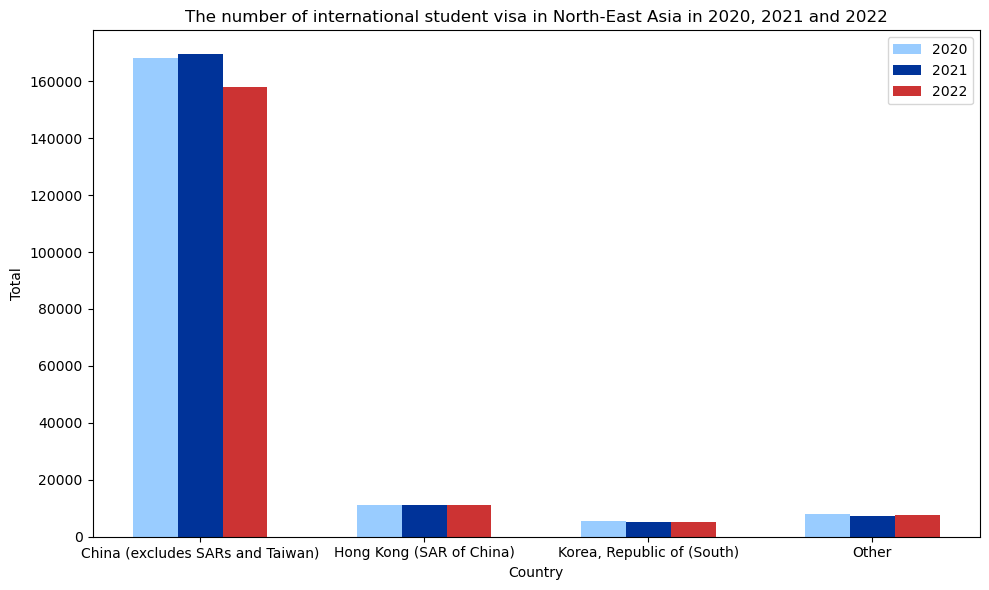

In [32]:

# Extracting data for plotting
countries = top_3_other_df['Country']
total_2020 = top_3_other_df['Total 2020']
total_2021 = top_3_other_df['Total-2021']
total_2022 = top_3_other_df['Total-2022']

# Set the width of the bars
bar_width = 0.2

# Set the x locations for the groups
index = np.arange(len(countries))

# Plotting the bar chart with specified colors
plt.figure(figsize=(10, 6))


plt.bar(index, total_2020, bar_width, label='2020', color='#99CCFF')
plt.bar(index + bar_width, total_2021, bar_width, label='2021', color='#003399')
plt.bar(index + 2 * bar_width, total_2022, bar_width, label='2022', color='#CC3333')

# Add labels, title, and legend
plt.xlabel('Country')
plt.ylabel('Total')
plt.title('The number of international student visa in North-East Asia in 2020, 2021 and 2022')
plt.xticks(index + bar_width, countries)
plt.legend()

plt.tight_layout()
plt.show()


<p>In North-East Asia, Chinese student visas account for the majority, reaching more than 160,000. Additionally, Hong Kong student visas are around 15,000, which is double the number of Korean student visas.</p> 

<p><b>Reasons for Many Chinese Students Coming to Australia</b>: 
    <li> Geographically, Australia is relatively close to China, making it a convenient destination for Chinese students. They are drawn to Australia due to its high-quality education and globally recognized universities. 
    <li> The availability of post-study work visas allows them to gain valuable work experience. Australia’s multicultural environment, safety, and political stability provide a welcoming and secure atmosphere. Additionally, strong educational ties and partnerships between Australia and China enhance the appeal for Chinese students. 
    <li> The entrance exam in China (Gaokao) is one of the most stressful periods for both Chinese students and their parents. It is the most important exam for all high school graduates looking to get an undergraduate education. Therefore, it comes as no surprise that many Chinese students view studying abroad as an opportunity to avoid this intense and fierce competition. Many parents see it as a chance for their children to escape this stressful period.</p>


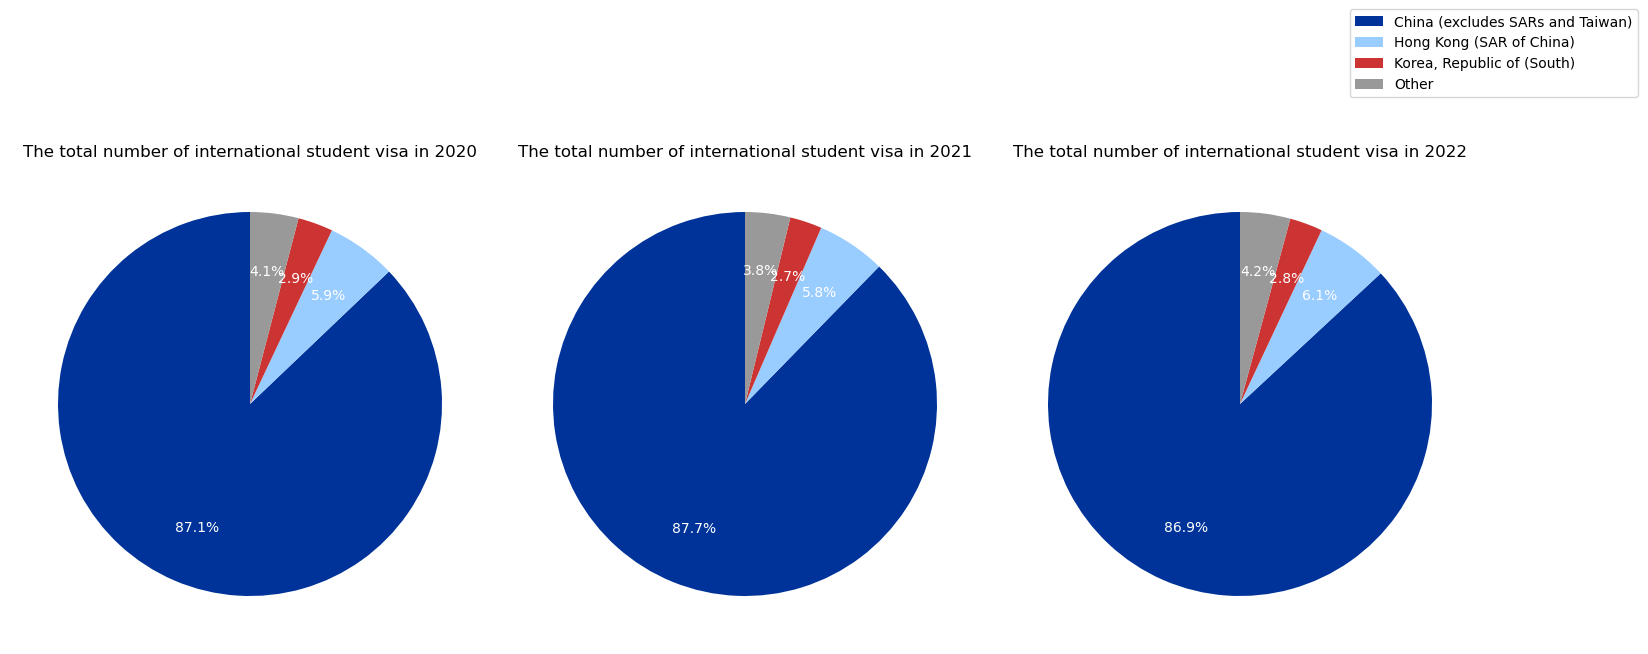

In [33]:
# Define a colormap with enough colors for all countries
colors = ['#003399','#99CCFF', '#CC3333','#999999']

# Create subplots for each year
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

# Plot pie chart for 2020
axs[0].pie(total_2020, autopct='%1.1f%%', startangle=90,colors=colors,labeldistance=None, pctdistance=0.7, textprops={'color': 'white'})
axs[0].set_title('The total number of international student visa in 2020')

# Plot pie chart for 2021
axs[1].pie(total_2021, autopct='%1.1f%%', startangle=90,colors=colors, labeldistance=None, pctdistance=0.7, textprops={'color': 'white'})
axs[1].set_title('The total number of international student visa in 2021')

# Plot pie chart for 2022
axs[2].pie(total_2022, autopct='%1.1f%%', startangle=90,colors=colors, labeldistance=None, pctdistance=0.7, textprops={'color': 'white'})
axs[2].set_title('The total number of international student visa in 2022')

# Create a legend for all subplots
fig.legend(countries, loc='lower right', bbox_to_anchor=(1.1, 1))

# Show the plot
plt.tight_layout()
plt.show()


## 3.2 South-East Asia



In [34]:
south_east_asia = birth_gender[(birth_gender['Area']== 'South-East Asia')]

In [35]:
south_east_asia

,Area,Country,Total 2020,Total-2021,Total-2022
78,South-East Asia,Brunei Darussalam,397,388,363
79,South-East Asia,Cambodia,1968,1956,2124
80,South-East Asia,Indonesia,12663,12089,12385
81,South-East Asia,Laos,275,247,280
82,South-East Asia,Malaysia,27098,24273,22929
83,South-East Asia,Myanmar,2114,1867,2139
84,South-East Asia,Philippines,5005,4227,5411
85,South-East Asia,Singapore,20075,18992,18416
86,South-East Asia,Thailand,2501,2150,2235
87,South-East Asia,Timor-Leste,86,63,86


In [36]:
south_east_asia_df = south_east_asia.loc[:,[ 'Country', 'Total 2020','Total-2021','Total-2022']]

In [37]:
south_east_asia_df

,Country,Total 2020,Total-2021,Total-2022
78,Brunei Darussalam,397,388,363
79,Cambodia,1968,1956,2124
80,Indonesia,12663,12089,12385
81,Laos,275,247,280
82,Malaysia,27098,24273,22929
83,Myanmar,2114,1867,2139
84,Philippines,5005,4227,5411
85,Singapore,20075,18992,18416
86,Thailand,2501,2150,2235
87,Timor-Leste,86,63,86


In [38]:
south_east_asia_df.columns

Index(['Country', 'Total 2020', 'Total-2021', 'Total-2022'], dtype='object')

In [40]:
# Calculate the median value for 2020, 2021 and 2022
median_value_2020 = south_east_asia_df['Total 2020'].median()
median_value_2021 = south_east_asia_df['Total-2021'].median()
median_value_2022 = south_east_asia_df['Total-2022'].median()

# Initialize variables to store sum values and rows for 'Others' for each year 2020,2021 and 2022
sum_values_2020 = 0
other_countries_rows_2020 = []
sum_values_2021 = 0
other_countries_rows_2021 = []
sum_values_2022 = 0
other_countries_rows_2022 = []

# Iterate over each row in the DataFrame in 2020:
for index, row in south_east_asia_df.iterrows():
    if row['Total 2020'] > median_value_2020:
        # Keep the same country with its value
        other_countries_rows_2020.append(row)
    else:
        # Add its value to the sum
        sum_values_2020 += row['Total 2020']

# Iterate over each row in the DataFrame in 2021:
for index, row in south_east_asia_df.iterrows():
    if row['Total-2021'] > median_value_2021:
        # Keep the same country with its value
        other_countries_rows_2021.append(row)
    else:
        # Add its value to the sum
        sum_values_2021 += row['Total-2021']
        
# Iterate over each row in the DataFrame in 2022:
for index, row in south_east_asia_df.iterrows():
    if row['Total-2022'] > median_value_2022:
        # Keep the same country with its value
        other_countries_rows_2022.append(row)
    else:
        # Add its value to the sum
        sum_values_2022 += row['Total-2022']
        
# Create a DataFrame for 'Others' with the sum of values for each year
others_df = pd.DataFrame({'Country': ['Others'], 'Total 2020': [sum_values_2020], 'Total-2021': [sum_values_2022],'Total-2022': [sum_values_2022]})

# Append the rows for 'Others' to the DataFrame
new_south_east_asia_df = pd.concat([others_df, pd.DataFrame(other_countries_rows_2020)])

new_south_east_asia_df                              

,Country,Total 2020,Total-2021,Total-2022
0,Others,7341,7227,7227
80,Indonesia,12663,12089,12385
82,Malaysia,27098,24273,22929
84,Philippines,5005,4227,5411
85,Singapore,20075,18992,18416
88,Vietnam,24340,25675,29838


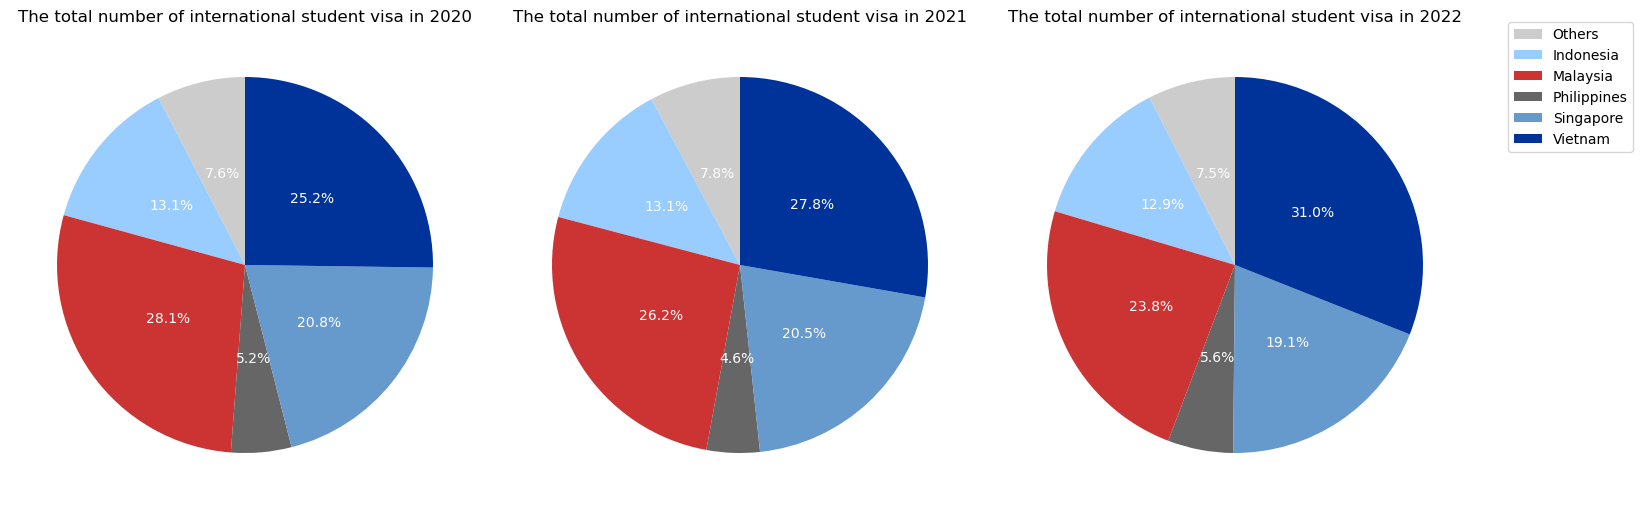

In [41]:

# Extracting data for plotting
countries = new_south_east_asia_df['Country']
total_2020 = new_south_east_asia_df['Total 2020']
total_2021 = new_south_east_asia_df['Total-2021']
total_2022 = new_south_east_asia_df['Total-2022']

# Define a colormap with enough colors for all countries
colors = ['#CCCCCC','#99CCFF', '#CC3333','#666666','#6699CC','#003399']
# Create subplots for each year
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot pie chart for 2020
axs[0].pie(total_2020, autopct='%1.1f%%', startangle=90,colors=colors,labeldistance=None, pctdistance=0.5, textprops={'color': 'white'})
axs[0].set_title('The total number of international student visa in 2020')

# Plot pie chart for 2021
axs[1].pie(total_2021, autopct='%1.1f%%', startangle=90,colors=colors,labeldistance=None, pctdistance=0.5, textprops={'color': 'white'})
axs[1].set_title('The total number of international student visa in 2021')

# Plot pie chart for 2022
axs[2].pie(total_2022, autopct='%1.1f%%', startangle=90,colors=colors,labeldistance=None, pctdistance=0.5, textprops={'color': 'white'})
axs[2].set_title('The total number of international student visa in 2022')

# Create a legend for all subplots
fig.legend(countries, loc='upper right', bbox_to_anchor=(1.1, 1))

# Show the plot
plt.tight_layout()
plt.show()

<h3>Overall Insights:</h3>
<ul>
    <li>Vietnam leads in the number of international student visas, followed by Malaysia and Singapore. Conversely, the Philippines has the lowest number of international student visas from 2020 to 2022.</li>
    <li>Remarkably, even during the Covid-19 era in 2021, international student visas in Vietnam increased by around 2%. In 2022, with the pandemic receding, the number surged significantly by 31%.</li>
    <li>The number of international student visas from Indonesia and Singapore remained relatively stable during the Covid-19 era. However, post-pandemic, there was a slight decline of approximately 0.5%.</li>
    <li>Malaysian student visas decreased during the Covid-19 era in 2021, and even after the pandemic subsided, the numbers fell by around 3%.</li>
</ul>

<p><b>Possible Reasons for the Decline in Malaysian Student Visas Post-Covid-19:</b> The unexpected decline in Malaysian student visas after Covid-19 could be attributed to several factors. Economic uncertainty during and after the pandemic might have impacted the ability of Malaysian families to afford overseas education. Additionally, the rise of high-quality online education options and increased domestic opportunities may have influenced students to pursue their studies locally. Furthermore, lingering travel restrictions and health concerns might have deterred students from studying abroad.</p>

        

## 3.3 Southern and Central Asia

In [42]:
southern_central_asia = birth_gender[(birth_gender['Area']== 'Southern and Central Asia')].loc[:,[ 'Country', 'Total 2020','Total-2021','Total-2022']]

In [43]:
southern_central_asia.describe()

,Total 2020,Total-2021,Total-2022
count,15.000000,15.000000,15.000000
mean,9357.533333,6993.933333,7731.933333
std,20674.880597,14821.405652,16005.289039
min,0.000000,0.000000,0.000000
25%,40.000000,46.000000,38.000000
50%,236.000000,229.000000,256.000000
75%,7998.500000,6408.000000,6894.000000
max,77735.000000,55369.000000,58316.000000


In [44]:
# Calculate the median value for 2020, 2021 and 2022
seventy_fifth_percentile_2020 = southern_central_asia['Total 2020'].quantile(0.75)
seventy_fifth_percentile_2021 = southern_central_asia['Total-2021'].quantile(0.75)
seventy_fifth_percentile_2022 = southern_central_asia['Total-2022'].quantile(0.75)

# Initialize variables to store sum values and rows for 'Others' for each year 2020,2021 and 2022
sum_values_2020 = 0
other_countries_rows_2020 = []
sum_values_2021 = 0
other_countries_rows_2021 = []
sum_values_2022 = 0
other_countries_rows_2022 = []

# Iterate over each row in the DataFrame in 2020:
for index, row in southern_central_asia.iterrows():
    if row['Total 2020'] > seventy_fifth_percentile_2020:
        # Keep the same country with its value
        other_countries_rows_2020.append(row)
    else:
        # Add its value to the sum
        sum_values_2020 += row['Total 2020']

# Iterate over each row in the DataFrame in 2021:
for index, row in southern_central_asia.iterrows():
    if row['Total-2021'] > seventy_fifth_percentile_2021:
        # Keep the same country with its value
        other_countries_rows_2021.append(row)
    else:
        # Add its value to the sum
        sum_values_2021 += row['Total-2021']
        
# Iterate over each row in the DataFrame in 2022:
for index, row in south_east_asia_df.iterrows():
    if row['Total-2022'] > seventy_fifth_percentile_2022:
        # Keep the same country with its value
        other_countries_rows_2022.append(row)
    else:
        # Add its value to the sum
        sum_values_2022 += row['Total-2022']
        
# Create a DataFrame for 'Others' with the sum of values for each year
others_df = pd.DataFrame({'Country': ['Others'], 'Total 2020': [sum_values_2020], 'Total-2021': [sum_values_2022],'Total-2022': [sum_values_2022]})

# Append the rows for 'Others' to the DataFrame
southern_central_asia_df = pd.concat([others_df, pd.DataFrame(other_countries_rows_2020)])

southern_central_asia_df            

,Country,Total 2020,Total-2021,Total-2022
0,Others,9145,12638,12638
104,India,77735,55369,58316
108,Nepal,30965,23138,28989
109,Pakistan,10093,7654,7738
110,Sri Lanka,12425,10947,11876


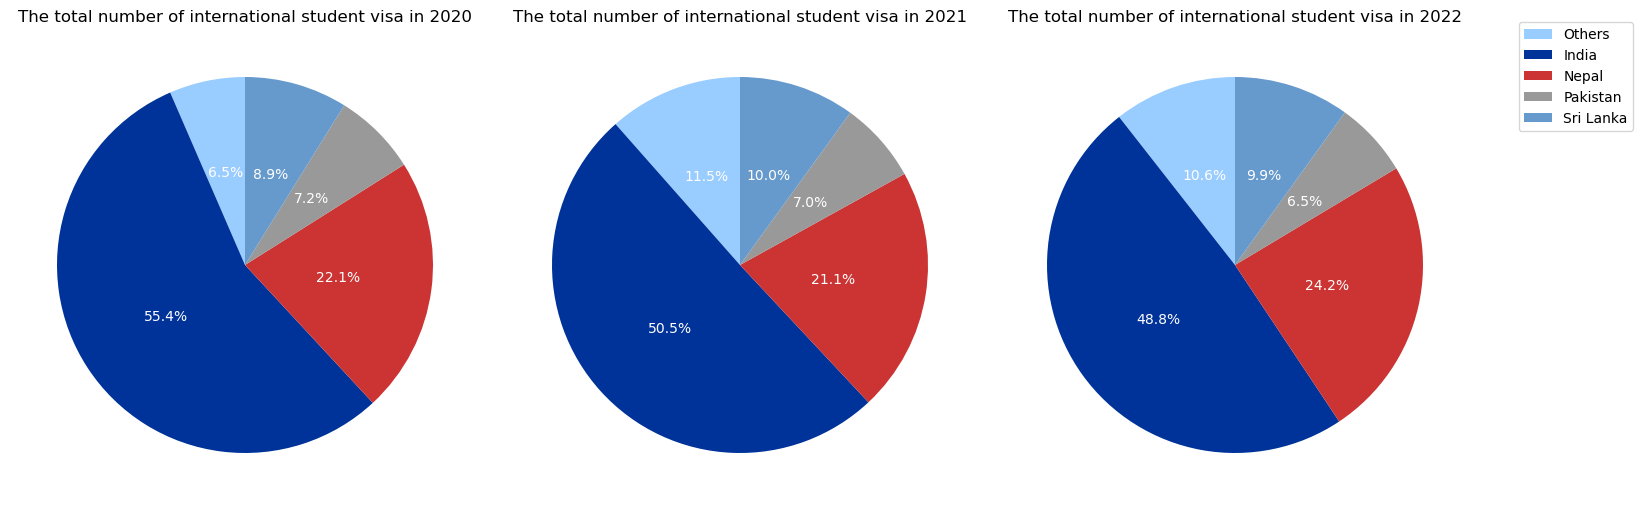

In [45]:
# Extracting data for plotting
countries = southern_central_asia_df ['Country']
total_2020 = southern_central_asia_df ['Total 2020']
total_2021 = southern_central_asia_df ['Total-2021']
total_2022 = southern_central_asia_df ['Total-2022']

# Define a colormap with enough colors for all countries
colors = ['#99CCFF','#003399', '#CC3333','#999999','#6699CC']

# Create subplots for each year
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot pie chart for 2020
axs[0].pie(total_2020, autopct='%1.1f%%', startangle=90,colors=colors,labeldistance=None, pctdistance=0.5, textprops={'color': 'white'})
axs[0].set_title('The total number of international student visa in 2020')

# Plot pie chart for 2021
axs[1].pie(total_2021, autopct='%1.1f%%', startangle=90,colors=colors,labeldistance=None, pctdistance=0.5, textprops={'color': 'white'})
axs[1].set_title('The total number of international student visa in 2021')

# Plot pie chart for 2022
axs[2].pie(total_2022, autopct='%1.1f%%', startangle=90,colors=colors,labeldistance=None, pctdistance=0.5, textprops={'color': 'white'})
axs[2].set_title('The total number of international student visa in 2022')

# Create a legend for all subplots
fig.legend(countries, loc='upper right', bbox_to_anchor=(1.1, 1))

# Show the plot
plt.tight_layout()
plt.show()

<h3>Overall Insights:</h3>
<ul>
    <li>India leads in the number of international student visas at around 55%, followed by Nepal with a quarter of the total. The remaining quarter comprises students from Sri Lanka, Pakistan, and other countries.</li>
    <li>Remarkably, during the Covid-19 era in 2021, international student visas in India decreased by around 5%. In 2022, with the pandemic receding, the decline continued to 48.8%.</li>
    <li>The number of international student visas from Nepal slightly fell during the Covid-19 era (2021). However, in 2022, as the pandemic receded, it grew by 24.2%.</li>
    <li>The number of international student visas from Pakistan decreased during the Covid-19 era in 2021, and even after the pandemic subsided, the numbers fell by around 0.5%.</li>
    <li>The number of student visas from Sri Lanka increased during Covid-19, and once the pandemic finished, it remained relatively stable.</li>
</ul>


# IV. THE INTERNATIONAL STUDENT VISAS IN EACH INSTITUTION

In [46]:
! pip install pyogrio

## 4.1 STATE

In [47]:
state_totals = pd.read_excel(' Commencing and All Overseas Students by State, Higher Education Institution.xlsx')
state_totals.head()

,State,Institution,Total_2020,Total_2021,Total_2022
0,New South Wales,Charles Sturt University,18772,18001,14683
1,New South Wales,Macquarie University,17413,16058,15446
2,New South Wales,Southern Cross University,9040,7704,7702
3,New South Wales,The University of New England,9716,8238,7139
4,New South Wales,The University of Newcastle,15008,15288,13717


In [48]:
state_totals['State'].unique()

array(['New South Wales', 'Victoria', 'Queensland', 'Western Australia',
       'South Australia', 'Tasmania', 'Northern Territory',
       'Australian Capital Territory', 'Multi-State', 'Total'],
      dtype=object)

In [49]:
# Total of students in New South Wales for 3 years: 2020, 2021 and 2022
nsw_totals = state_totals[state_totals['State'] == 'New South Wales']
nsw_totals2020 = nsw_totals['Total_2020'].sum()
nsw_totals2021 = nsw_totals['Total_2021'].sum()
nsw_totals2022 = nsw_totals['Total_2022'].sum()

# Total of students in Victoria for 3 years: 2020, 2021 and 2022
vic_totals = state_totals[state_totals['State'] == 'Victoria']
vic_totals2020 = vic_totals['Total_2020'].sum()
vic_totals2021 = vic_totals['Total_2021'].sum()
vic_totals2022 = vic_totals['Total_2022'].sum()

# Total of students in Queensland for 3 years: 2020, 2021 and 2022
qld_totals = state_totals[state_totals['State'] == 'Queensland']
qld_totals2020 = qld_totals['Total_2020'].sum()
qld_totals2021 = qld_totals['Total_2021'].sum()
qld_totals2022 = qld_totals['Total_2022'].sum()

# Total of students in Western Australia for 3 years: 2020, 2021 and 2022
wa_totals = state_totals[state_totals['State'] == 'Western Australia']
wa_totals2020 = wa_totals['Total_2020'].sum()
wa_totals2021 = wa_totals['Total_2021'].sum()
wa_totals2022 = wa_totals['Total_2022'].sum()

# Total of students in South Australia for 3 years: 2020, 2021 and 2022
sa_totals = state_totals[state_totals['State'] == 'South Australia']
sa_totals2020 = sa_totals['Total_2020'].sum()
sa_totals2021 = sa_totals['Total_2021'].sum()
sa_totals2022 = sa_totals['Total_2022'].sum()

# Total of students in Tasmania for 3 years: 2020, 2021 and 2022
tas_totals = state_totals[state_totals['State'] == 'Tasmania']
tas_totals2020 = tas_totals['Total_2020'].sum()
tas_totals2021 = tas_totals['Total_2021'].sum()
tas_totals2022 = tas_totals['Total_2022'].sum()

# Total of students in Northern Territory for 3 years: 2020, 2021 and 2022
nt_totals = state_totals[state_totals['State'] == 'Northern Territory']
nt_totals2020 = nt_totals['Total_2020'].sum()
nt_totals2021 = nt_totals['Total_2021'].sum()
nt_totals2022 = nt_totals['Total_2022'].sum()

# Total of students in Australian Capital Territory for 3 years: 2020, 2021 and 2022
act_totals = state_totals[state_totals['State'] == 'Australian Capital Territory']
act_totals2020 = act_totals['Total_2020'].sum()
act_totals2021 = act_totals['Total_2021'].sum()
act_totals2022 = act_totals['Total_2022'].sum()

# Total of students in Multi-State for 3 years: 2020, 2021 and 2022
multi_totals = state_totals[state_totals['State'] == 'Multi-State']
multi_totals2020 = multi_totals['Total_2020'].sum()
multi_totals2021 = multi_totals['Total_2021'].sum()
multi_totals2022 = multi_totals['Total_2022'].sum()

In [51]:

state_total = {
    'State': ['New South Wales', 'Victoria', 'Queensland', 'Western Australia',
              'South Australia', 'Australian Capital Territory', 'Multi-State',
              'Tasmania', 'Northern Territory'],
    'Total Commencing 2020': [
        nsw_totals2020,vic_totals2020,qld_totals2020, wa_totals2020, sa_totals2020, tas_totals2020,nt_totals2020,act_totals2020,
        multi_totals2020
    ],
    'Total Commencing 2021': [nsw_totals2021,vic_totals2021,qld_totals2021, wa_totals2021, sa_totals2021, tas_totals2021,nt_totals2021,act_totals2021,
        multi_totals2021],
    'Total Commencing 2022': [nsw_totals2022,vic_totals2022,qld_totals2022, wa_totals2022, sa_totals2022, tas_totals2022,nt_totals2022,act_totals2022,
        multi_totals2022]
    
}

# Create DataFrame
state_total_df = pd.DataFrame(state_total)

state_total_df


,State,Total Commencing 2020,Total Commencing 2021,Total Commencing 2022
0,New South Wales,202949,191797,190346
1,Victoria,170311,160527,155954
2,Queensland,98750,95829,92800
3,Western Australia,56344,53339,55363
4,South Australia,54495,48750,50127
5,Australian Capital Territory,21629,14754,15042
6,Multi-State,6222,5948,4111
7,Tasmania,15523,16892,16379
8,Northern Territory,15012,13079,12867


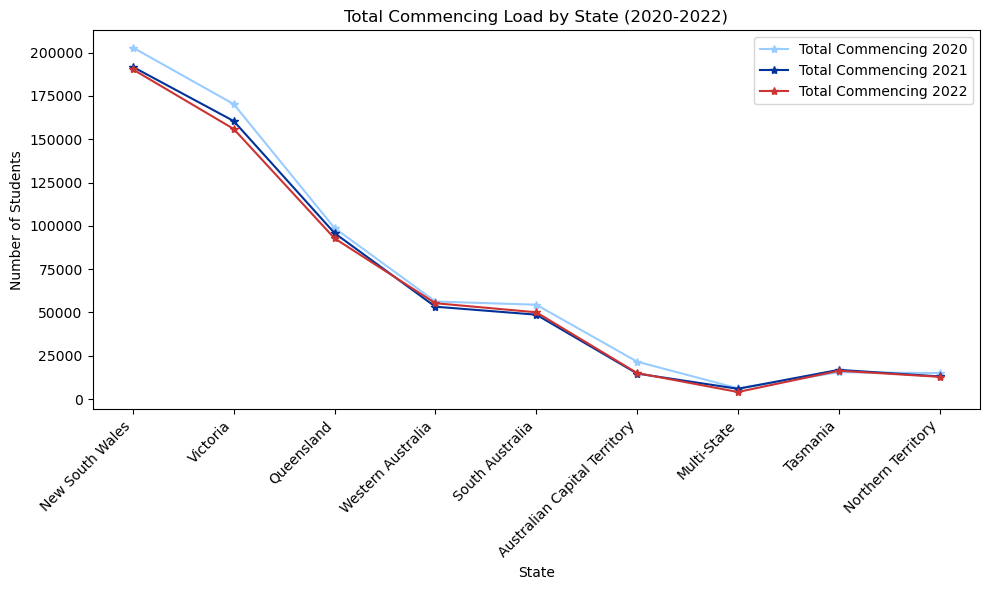

In [52]:
# Extracting data for plotting
state = state_total_df['State']
total_load_2020 = state_total_df['Total Commencing 2020']
total_load_2021 = state_total_df['Total Commencing 2021']
total_load_2022 = state_total_df['Total Commencing 2022']

colors = ['#99CCFF', '#003399', '#CC3333']


# Create the line chart
plt.figure(figsize=(10, 6))

# Plotting for each year
plt.plot(state, total_load_2020, marker='*', label='Total Commencing 2020',color=colors[0])
plt.plot(state, total_load_2021, marker='*', label='Total Commencing 2021',color=colors[1])
plt.plot(state, total_load_2022, marker='*', label='Total Commencing 2022', color=colors[2])

# Set the title and labels
plt.title('Total Commencing Load by State (2020-2022)')
plt.xlabel('State')
plt.ylabel('Number of Students')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


<h3>Overall Insights:</h3>
<ul>
    <li>New South Wales leads in student visas, following Victoria  and Queensland. Another state maintains around 50,000 student visas</li>
    <li> Remarkably, before the onset of COVID-19, New South Wales boasted more than 200,000 student visas. However, the pandemic caused this number to plummet to approximately 190,000 in 2021 and 2022.Also, Victoria had around 175.000 students before COVID-19, after COVID-19 it fall down to approximately 160.000 students. 
    <li> In contrast, Queensland, Western Australia, South Australia, and Tasmania experienced only slight declines in student visas during the same period.
    <li> Meanwhile, the Australian Capital Territory, Multi-State, and Northern Territory saw no significant changes before or after COVID-19, with student visa numbers remaining relatively low at around 20,000. 

In [53]:


# Define the list of states
states = ['New South Wales', 'Victoria', 'Queensland', 'Western Australia',
          'South Australia', 'Australian Capital Territory', 'Tasmania', 'Northern Territory']

total_2021_without_multi_state = state_total_df[state_total_df['State'] != 'Multi-State']['Total Commencing 2021']

# Define the latitude and longitude coordinates for each state
latitude = [-31.840233, -37.020100, -20.917574, -25.042261, -30.000233, -35.473469, -41.454520, -19.491411]
longitude = [145.612793, 144.964600, 142.702789, 117.793221, 136.209152, 149.012375, 145.970665, 132.550964]

# Create a DataFrame to store the state information
state_df = pd.DataFrame({
    'State': states,
    'Latitude': latitude,
    'Longitude': longitude,
    'Total 2021':total_2021_without_multi_state
})

# Add a column for state coordinates as tuples
state_df['State Coordinates'] = list(zip(state_df['Latitude'], state_df['Longitude']))


state_df



,State,Latitude,Longitude,Total 2021,State Coordinates
0,New South Wales,-31.840233,145.612793,191797,"(-31.840233, 145.612793)"
1,Victoria,-37.020100,144.964600,160527,"(-37.0201, 144.9646)"
2,Queensland,-20.917574,142.702789,95829,"(-20.917574, 142.702789)"
3,Western Australia,-25.042261,117.793221,53339,"(-25.042261, 117.793221)"
4,South Australia,-30.000233,136.209152,48750,"(-30.000233, 136.209152)"
5,Australian Capital Territory,-35.473469,149.012375,14754,"(-35.473469, 149.012375)"
7,Tasmania,-41.454520,145.970665,16892,"(-41.45452, 145.970665)"
8,Northern Territory,-19.491411,132.550964,13079,"(-19.491411, 132.550964)"


### 4.1.1 Visualisation by Map

/var/folders/gp/s31h1xy530vff43m73j0bczm0000gn/T/ipykernel_31692/2927984788.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


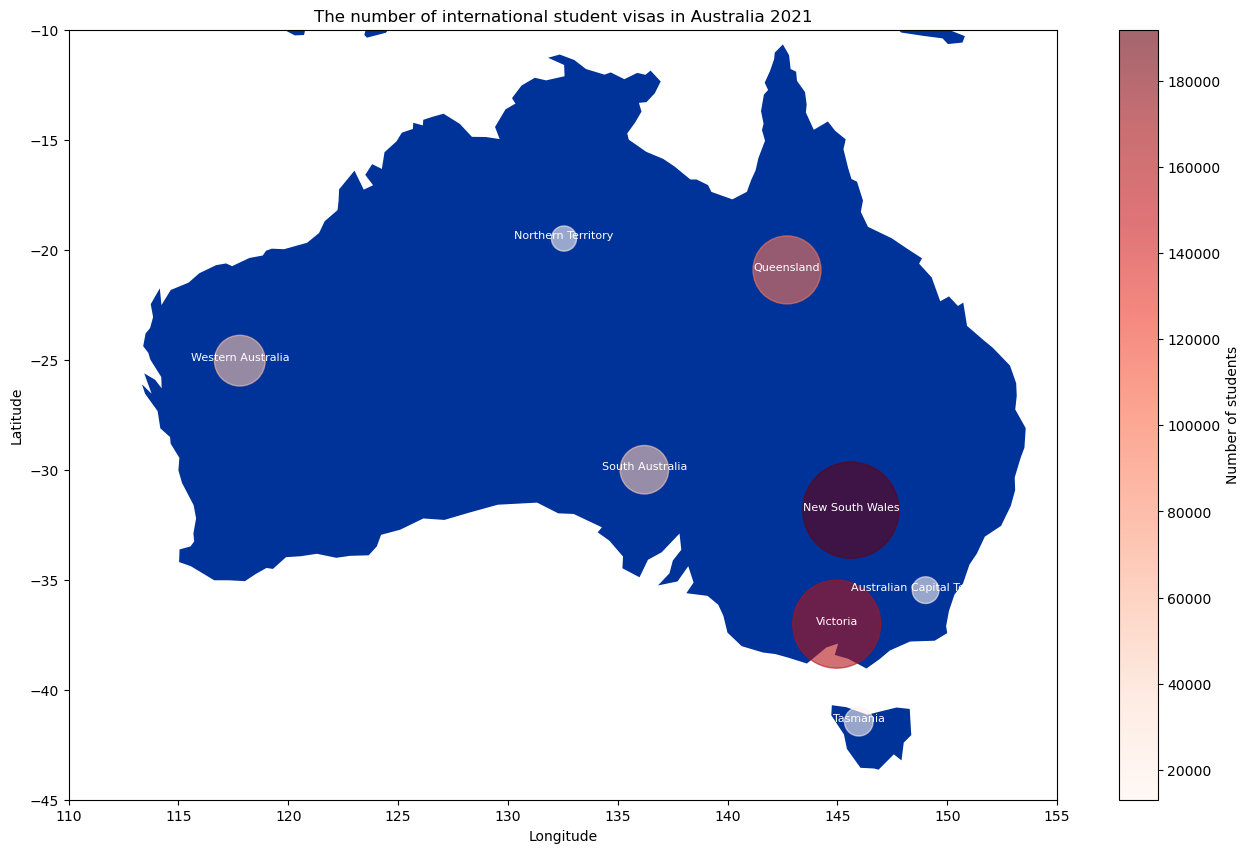

In [54]:

# Getting world map data from GeoPandas
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color='#003399', ax=ax)

# Plotting student visa data
x = state_df['Longitude']
y = state_df['Latitude']
z = state_df['Total 2021']
plt.scatter(x, y, 
            s=0.025*z,
            c=z,
            alpha=0.6,             
            cmap='Reds'
           )
plt.colorbar(label='Number of students')

# Annotating each point with state name
for i, row in state_df.iterrows():
    plt.text(row['Longitude'], row['Latitude'], row['State'], fontsize=8, ha='center', color='white')

# Creating axis limits and title
plt.xlim([110, 155])
plt.ylim([-45, -10])
plt.title("The number of international student visas in Australia 2021")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



## 4.2 Student Visas in Institution

### 4.2.1 VICTORIA STATE

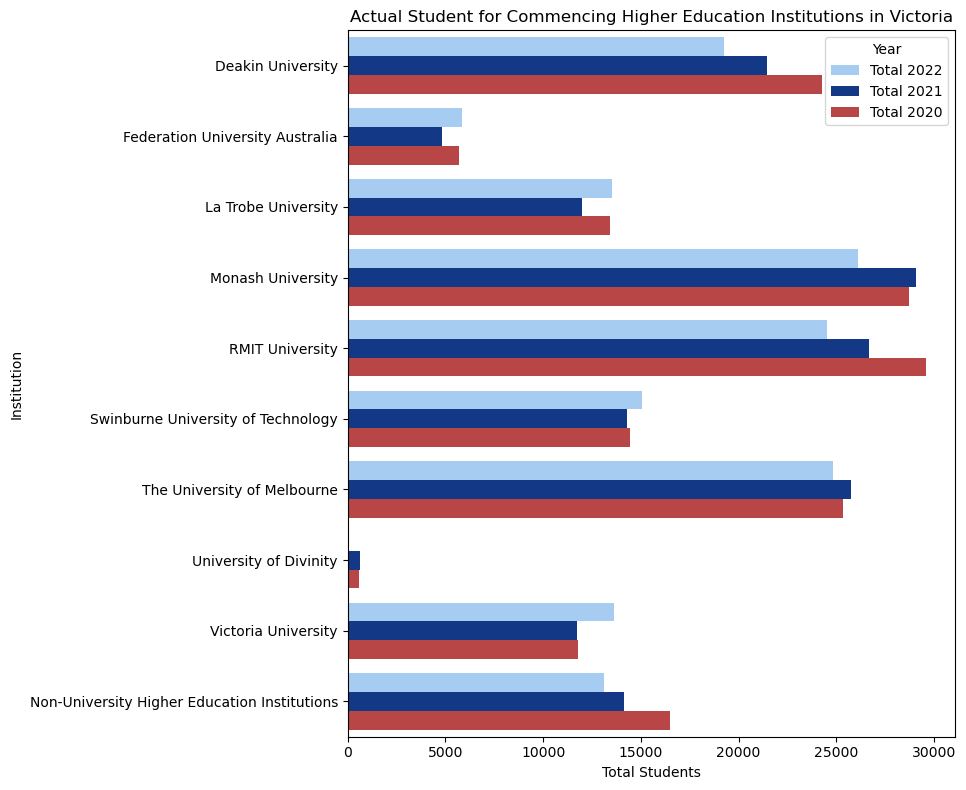

In [55]:
vic_totals = state_totals[state_totals['State'] == 'Victoria']

# Data for commencing overseas students
x_actual_commencing_2022 = vic_totals['Total_2022']
x_actual_commencing_2021 = vic_totals['Total_2021']
x_actual_commencing_2020 = vic_totals['Total_2020']
y_data = vic_totals['Institution']

# Create DataFrames for Seaborn
df_actual_commencing = pd.DataFrame({
    'Institution': y_data,
    'Total 2022': x_actual_commencing_2022,
    'Total 2021': x_actual_commencing_2021,
    'Total 2020': x_actual_commencing_2020
})

# Melt the DataFrames to have a single 'Total' column
df_actual_commencing_melted = df_actual_commencing.melt(id_vars='Institution', var_name='Year', value_name='Total Students')

colors = ['#99CCFF', '#003399', '#CC3333']

# Plotting the grouped bar charts using Seaborn
plt.figure(figsize=(16, 8))

# Plot for commencing overseas students
plt.subplot(1, 2, 1)
sns.barplot(data=df_actual_commencing_melted, x='Total Students', y='Institution', hue='Year', palette=colors)
plt.title('Actual Student for Commencing Higher Education Institutions in Victoria')
plt.xlabel('Total Students')
plt.ylabel('Institution')
plt.legend(title='Year')

# Show plot
plt.tight_layout()
plt.show()
                                                        

<h3>Overall Insights:</h3>
<ul>
    <li> Monash University ranks first in student visas, followed by the University of Melbourne and RMIT University. Both Monash University and the University of Melbourne are part of the Group of Eight, Australia's elite universities.
    <li> Most institutions saw a decline in student load from 2020 to 2021, likely due to the impacts of the COVID-19 pandemic.
    <li> Some institutions like La Trobe University, Monash University, The University of Melbourne, and Victoria University showed signs of recovery in 2022.
    <li> RMIT University and Swinburne University of Technology continued to see a decline in student load over the three years.
    <li> While the general trend for most institutions is a decline from 2020 to 2021, followed by a slight recovery or stabilization in 2022, the magnitude of these changes varies across institutions.

### 4.2.2 NEW SOUTH WALES STATE

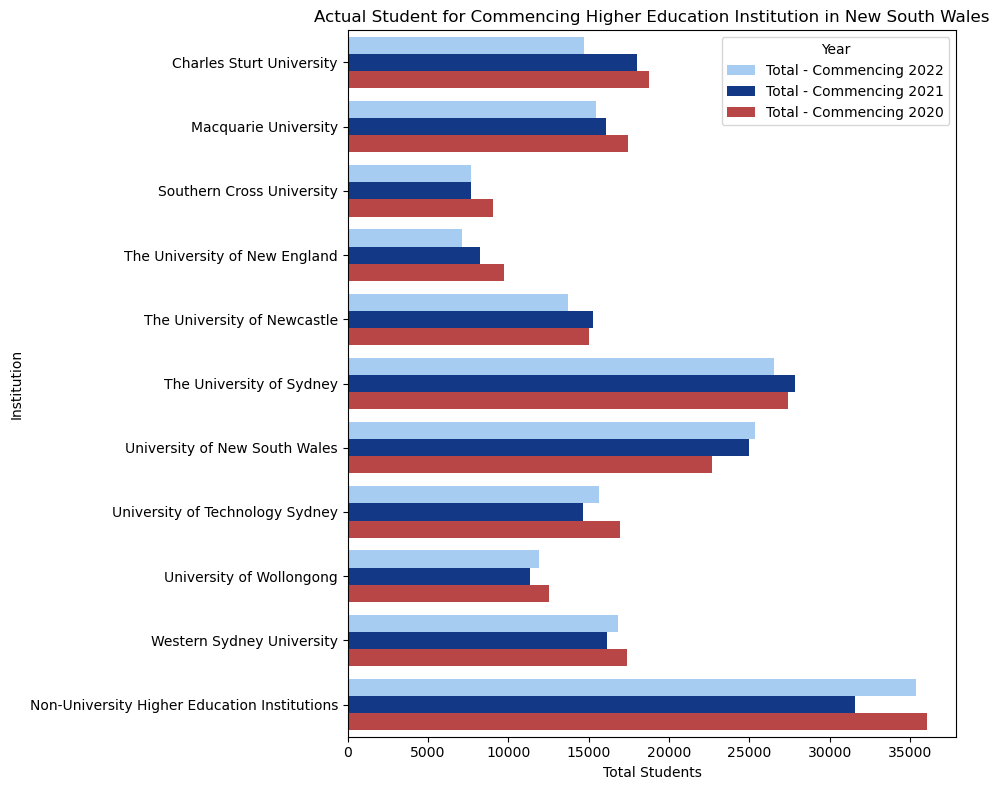

In [56]:
nsw_totals = state_totals[state_totals['State'] == 'New South Wales']
    
# Data for commencing overseas students
x_actual_commencing_2022 = nsw_totals['Total_2022']
x_actual_commencing_2021 = nsw_totals['Total_2021']
x_actual_commencing_2020 = nsw_totals['Total_2020']
y_data = nsw_totals['Institution']

# Create DataFrames for Seaborn
df_actual_commencing = pd.DataFrame({
    'Institution': y_data,
    'Total - Commencing 2022': x_actual_commencing_2022,
    'Total - Commencing 2021': x_actual_commencing_2021,
    'Total - Commencing 2020': x_actual_commencing_2020
})

# Melt the DataFrames to have a single 'Total' column
df_actual_commencing_melted = df_actual_commencing.melt(id_vars='Institution', var_name='Year', value_name='Total Students')
df_actual_commencing_all_melted = df_actual_commencing.melt(id_vars='Institution', var_name='Year', value_name='Total Students')


colors = ['#99CCFF', '#003399', '#CC3333']

# Plotting the grouped bar charts using Seaborn
plt.figure(figsize=(16, 8))

# Plot for commencing overseas students
plt.subplot(1, 2, 1)
sns.barplot(data=df_actual_commencing_melted, x='Total Students', y='Institution', hue='Year', palette = colors)
plt.title('Actual Student for Commencing Higher Education Institution in New South Wales')
plt.xlabel('Total Students')
plt.ylabel('Institution')
plt.legend(title='Year')


# Show plot
plt.tight_layout()
plt.show()

<h3>Overall Insights:</h3>
<ul>
    <li> The University of Sydney has the highest number of student visas, followed by the University of New South Wales. These universities saw a continuous increase in student visas even during and after the COVID-19 pandemic, a testament to their standing as top members of the Group of Eight, Australia's premier universities.
    <li> Many institutions, such as The University of Sydney, Western Sydney University, and non-university higher education institutions, showed significant recovery in 2022. Several institutions showed a decrease from 2020 to 2021, followed by a slight increase in 2022. This pattern indicates a gradual recovery.
    <li> Level 1 and 2 universities, such as the University of Technology Sydney and the University of Wollongong experienced a decline in student visas during the pandemic but saw a rebound once it subsided.
    <li> Western Sydney University and The University of Sydney showed substantial increases in student load in 2022, indicating a strong recovery.

### 4.2.3 QUEENSLAND STATE

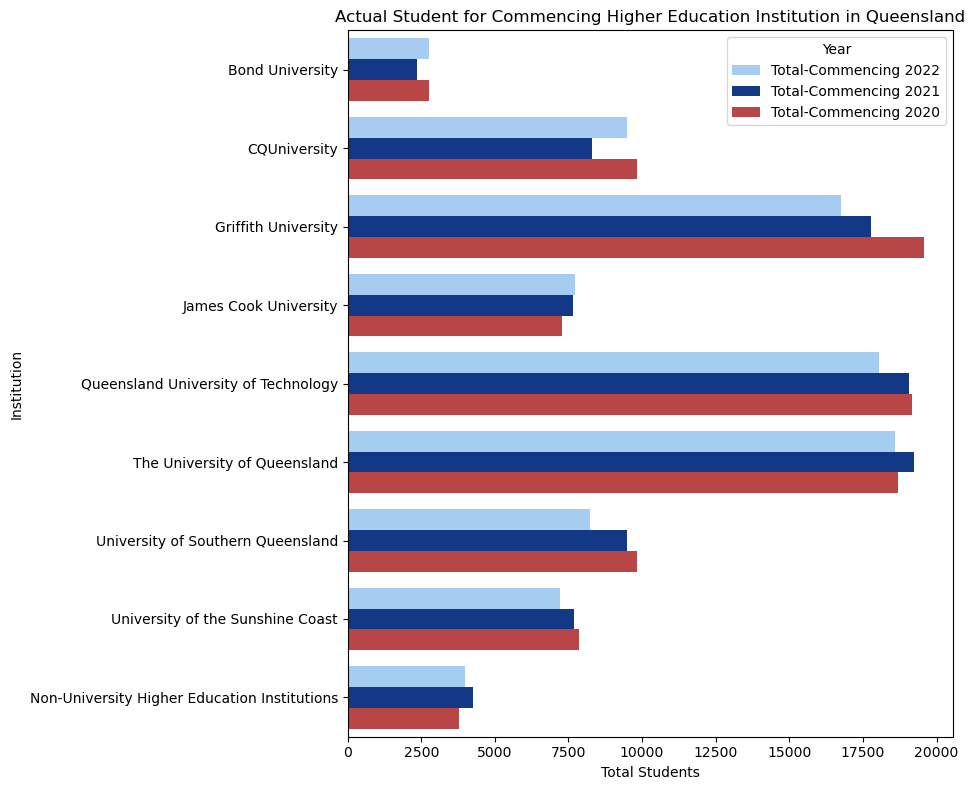

In [57]:

qld_totals = state_totals[state_totals['State'] == 'Queensland']
    
# Data for commencing overseas students
x_actual_commencing_2022 = qld_totals['Total_2022']
x_actual_commencing_2021 = qld_totals['Total_2021']
x_actual_commencing_2020 = qld_totals['Total_2020']
y_data = qld_totals['Institution']

# Create DataFrames for Seaborn
df_actual_commencing = pd.DataFrame({
    'Institution': y_data,
    'Total-Commencing 2022': x_actual_commencing_2022,
    'Total-Commencing 2021': x_actual_commencing_2021,
    'Total-Commencing 2020': x_actual_commencing_2020
})


# Melt the DataFrames to have a single 'Total' column
df_actual_commencing_melted = df_actual_commencing.melt(id_vars='Institution', var_name='Year', value_name='Total Students')
df_actual_commencing_all_melted = df_actual_commencing.melt(id_vars='Institution', var_name='Year', value_name='Total Students')


colors = ['#99CCFF', '#003399', '#CC3333']

# Plotting the grouped bar charts using Seaborn
plt.figure(figsize=(16, 8))

# Plot for commencing overseas students
plt.subplot(1, 2, 1)
sns.barplot(data=df_actual_commencing_melted, x='Total Students', y='Institution', hue='Year',palette = colors)
plt.title('Actual Student for Commencing Higher Education Institution in Queensland')
plt.xlabel('Total Students')
plt.ylabel('Institution')
plt.legend(title='Year')


# Show plot
plt.tight_layout()
plt.show()

<h3>Overall Insights:</h3>
<ul>
    <li> Similar to other states, most institutions in Queensland saw a decrease in student load from 2020 to 2021, likely due to the impacts of the COVID-19 pandemic.
    <li> Institutions with Notable Changes: CQUniversity and James Cook University increase in 2021 followed by a slight decrease in 2022.
    <li> Top 3 Universities in Queensland: Griffith University, Queensland University of Technology (QUT) and The University of Queensland (Group of Eight, Australia's premier universities) 
        <ul>
            <li> In 2020, Griffith University had the highest number of students compared to QUT and UQ, with around 20,000 students.
            <li> When COVID-19 occurred, the student numbers at Griffith decreased significantly, while the student numbers at QUT slightly increased, and UQ maintained its numbers.
            <li> By 2021, after the initial impacts of COVID-19, the number of students at Griffith continued to decrease to approximately 16,000, while both QUT and UQ also experienced decreases to around 17,500 students.
   


## 4.3 Commencing Students by State, Higher Education Institution and Broad Field of Education

In [58]:
institution_commencing_2020 = pd.read_excel('Commencing student 2020.xlsx')

In [59]:
institution_commencing_2020.head()

,State,Institution,Natural and Physical Sciences,Information Technology,Engineering and Related Technologies,Architecture and Building,"Agriculture, Environmental and Related Studies",Health,Education,Management and Commerce,Society and Culture,Creative Arts,"Food, Hospitality and Personal Services",Mixed Field Programs,Non-award courses,Total_2020
0,New South Wales,Charles Sturt University,498,1488,63,0,565,2697,5947,2217,4547,255,0,0,510,18772
1,New South Wales,Macquarie University,1740,1668,703,105,236,919,1178,3366,7860,791,0,0,597,17413
2,New South Wales,Southern Cross University,287,526,171,0,237,2054,1376,1906,1154,1048,0,926,205,9040
3,New South Wales,The University of New England,937,241,0,118,513,551,1836,1237,3683,104,0,493,171,9716
4,New South Wales,The University of Newcastle,824,463,759,627,277,3107,1666,2100,4756,494,0,0,209,15008


In [60]:
instituion_victoria =  institution_commencing_2020[(institution_commencing_2020['State'] == 'Victoria')]
instituion_victoria = instituion_victoria.drop(columns =['State'])
#Drop value "np"
instituion_victoria = instituion_victoria[(instituion_victoria != 'np').all(axis=1)]
instituion_victoria
# Ensure only the 'Institution' column remains as an object, and convert all other columns to int64
for column in instituion_victoria.columns:
    if column != 'Institution':
        instituion_victoria[column] = pd.to_numeric(instituion_victoria[column], errors='coerce').astype('int64')
        
instituion_victoria.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 11 to 20
Data columns (total 15 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Institution                                     10 non-null     object
 1   Natural and Physical Sciences                   10 non-null     int64 
 2   Information Technology                          10 non-null     int64 
 3   Engineering and Related Technologies            10 non-null     int64 
 4   Architecture and Building                       10 non-null     int64 
 5   Agriculture, Environmental and Related Studies  10 non-null     int64 
 6   Health                                          10 non-null     int64 
 7   Education                                       10 non-null     int64 
 8   Management and Commerce                         10 non-null     int64 
 9   Society and Culture                             10 non-null 

/var/folders/gp/s31h1xy530vff43m73j0bczm0000gn/T/ipykernel_31692/722988357.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(instituion_victoria['Institution'], rotation=90)  # Rotate the institution titles by 90 degrees


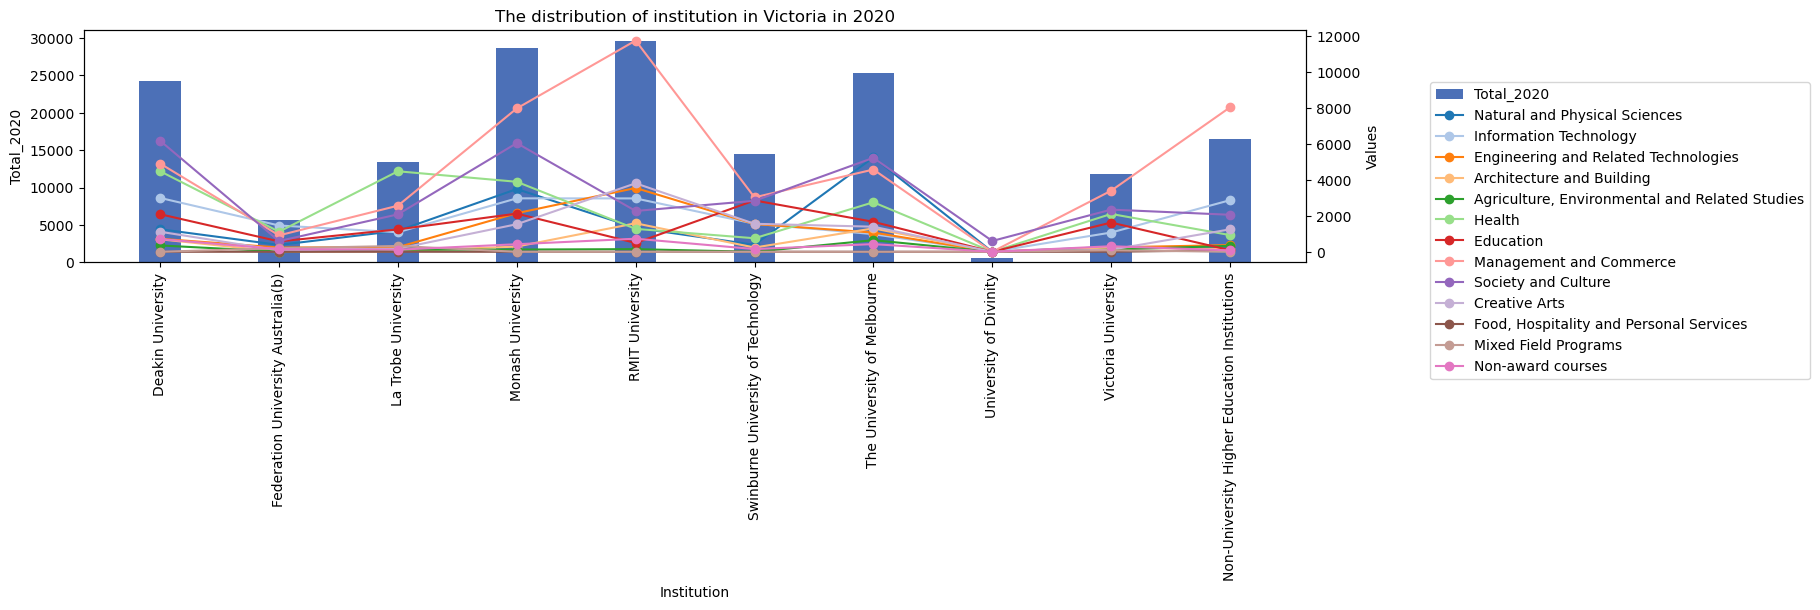

In [61]:

fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar chart for TOTAL(a)
bars = ax1.bar(instituion_victoria['Institution'], instituion_victoria['Total_2020'], color='#003399', alpha=0.7, label='Total_2020', width=0.35) # Specify width for bars
ax1.set_xlabel('Institution')
ax1.set_ylabel('Total_2020', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(instituion_victoria['Institution'], rotation=90)  # Rotate the institution titles by 90 degrees

# Line chart for other columns
ax2 = ax1.twinx()
colors = plt.cm.tab20.colors  # Use a colormap for better color differentiation
for idx, column in enumerate(instituion_victoria.columns[1:-1]):  # Exclude 'Institution' and 'TOTAL(a)'
    ax2.plot(instituion_victoria['Institution'], instituion_victoria[column], label=column, color=colors[idx % len(colors)], marker='o')

ax2.set_ylabel('Values')
ax2.tick_params(axis='y')

fig.tight_layout()


# Legend
fig.legend(loc='upper left', bbox_to_anchor=(1.02, 0.9))
plt.title('The distribution of institution in Victoria in 2020')
plt.show()


<h3>Overall Insights:</h3>
<ul>
    <li> The graph showed the top 3 field in Victoria state: Management and Commerce, Society and Culture, and Health. 
    <li> Management and Commerce (Light Orange), this field has the highest enrollments across most universities, especially prominent in RMIT University.
    <li> Society and Culture (Purple): This is another major field, showing high enrollments in Monash University, The University of Melbourne, and Deakin University.
    <li> Health (Green): Health is among the top three fields, especially in La Trobe University, Deakin University, and Monash University.
    <li> Education (Red): This field also has notable enrollments across several universities, with significant numbers in Swinburne University of Technology, Monash University, and Deakin University.
    <li> Information Technology (Light Blue) and Natural and Physical Sciences (Blue):These fields have steady enrollments, with peaks at specific institutions such as RMIT University and Monash University.

In [68]:
institution_NSW =  institution_commencing_2020[(institution_commencing_2020['State'] == 'New South Wales')]
institution_NSW = institution_NSW.drop(columns =['State'])
#Drop value "np"
institution_NSW = institution_NSW[(institution_NSW != 'np').all(axis=1)]
institution_NSW
# Ensure only the 'Institution' column remains as an object, and convert all other columns to int64
for column in institution_NSW.columns:
    if column != 'Institution':
        institution_NSW[column] = pd.to_numeric(institution_NSW[column], errors='coerce').astype('int64')
        
institution_NSW

,Institution,Natural and Physical Sciences,Information Technology,Engineering and Related Technologies,Architecture and Building,"Agriculture, Environmental and Related Studies",Health,Education,Management and Commerce,Society and Culture,Creative Arts,"Food, Hospitality and Personal Services",Mixed Field Programs,Non-award courses,Total_2020
0,Charles Sturt University,498,1488,63,0,565,2697,5947,2217,4547,255,0,0,510,18772
1,Macquarie University,1740,1668,703,105,236,919,1178,3366,7860,791,0,0,597,17413
2,Southern Cross University,287,526,171,0,237,2054,1376,1906,1154,1048,0,926,205,9040
3,The University of New England,937,241,0,118,513,551,1836,1237,3683,104,0,493,171,9716
4,The University of Newcastle,824,463,759,627,277,3107,1666,2100,4756,494,0,0,209,15008
5,The University of Sydney,2944,1522,2030,1182,206,4332,1049,6580,6741,1219,0,0,687,27388
6,University of New South Wales,2840,2402,3890,1006,76,1246,578,6912,3698,1200,0,0,1386,22676
7,University of Technology Sydney,1502,1601,1821,896,0,2074,398,5507,1857,2204,0,434,158,16947
8,University of Wollongong,736,1766,917,0,51,2084,968,2605,2483,669,0,162,472,12510
9,Western Sydney University,1314,788,893,1010,84,3997,861,2633,4850,780,0,333,147,17411


/var/folders/gp/s31h1xy530vff43m73j0bczm0000gn/T/ipykernel_31692/3255758391.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(institution_NSW['Institution'], rotation =90)


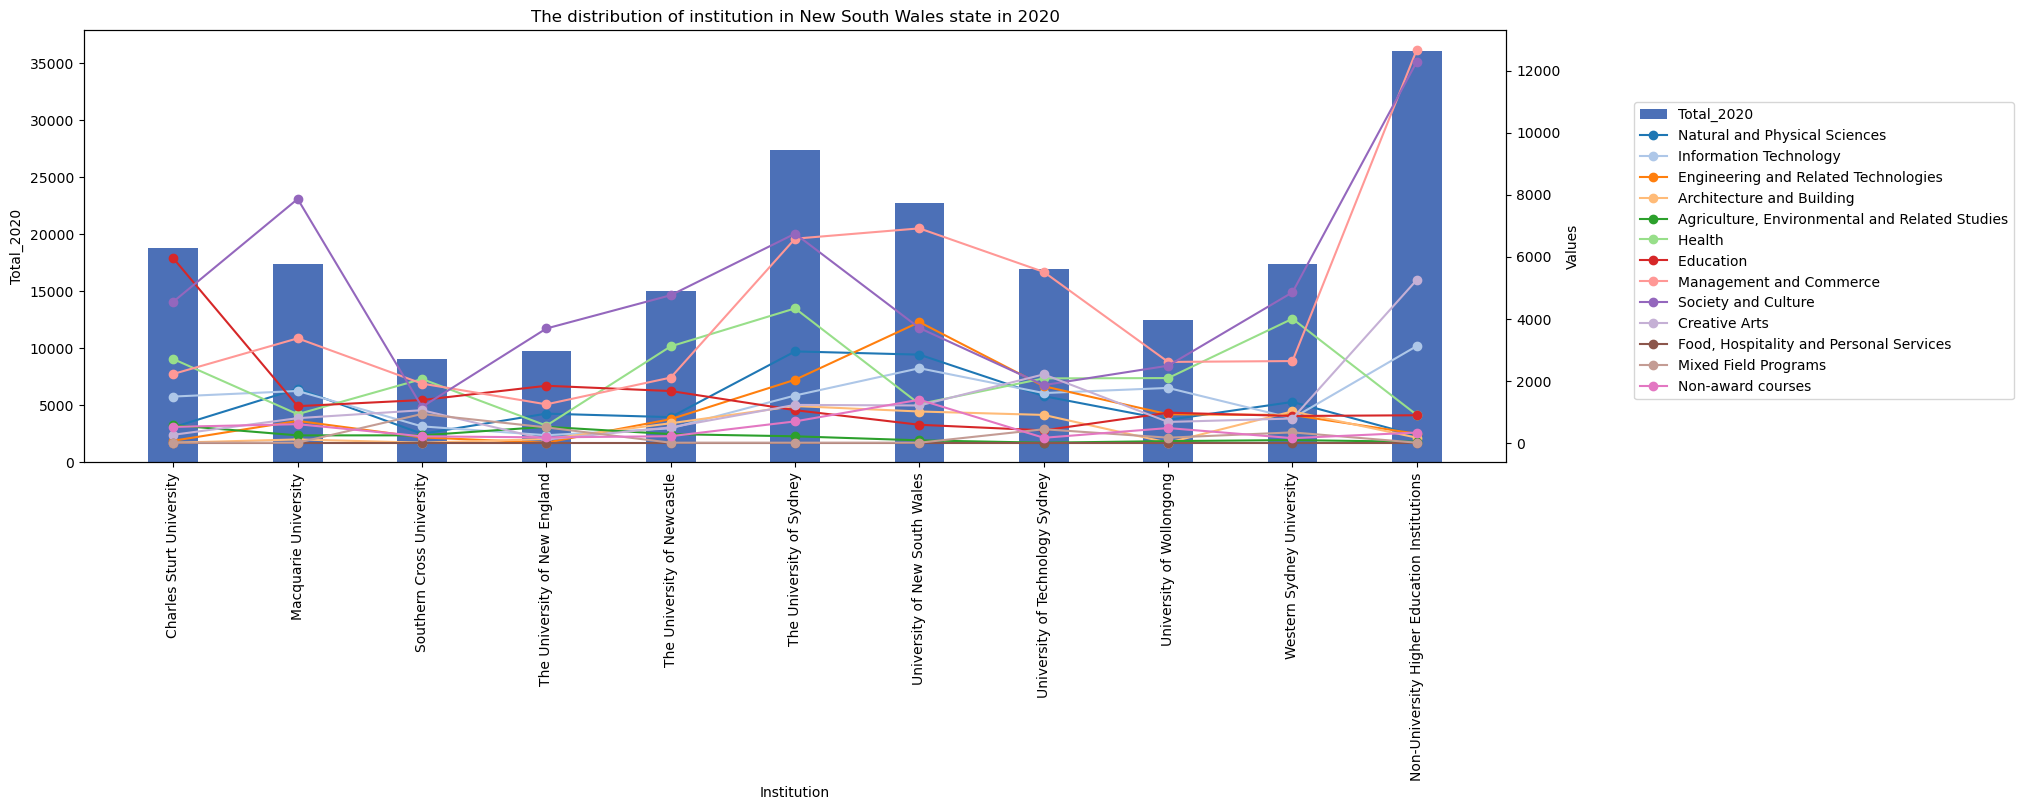

In [63]:
fig, ax1 = plt.subplots(figsize = (16,8))

#Visualisation bar chart

bars = ax1.bar(institution_NSW['Institution'], institution_NSW['Total_2020'], color ='#003399', alpha = 0.7, label ='Total_2020', width= 0.4)
ax1.set_xlabel('Institution')
ax1.set_ylabel('Total_2020',color = 'black')
ax1.tick_params(axis ='y', labelcolor ='black')
ax1.set_xticklabels(institution_NSW['Institution'], rotation =90)

#Line chart for the field
ax2 = ax1.twinx()
colors = plt.cm.tab20.colors
for idx, column in enumerate(institution_NSW.columns[1:-1]):
    ax2.plot(institution_NSW['Institution'], institution_NSW[column], label =column, color =colors[idx % len(colors)], marker ='o')
    
ax2.set_ylabel('Values')
ax2.tick_params(axis ='y')
fig.tight_layout()

fig.legend(loc= 'upper left', bbox_to_anchor =(1.02,0.9))
plt.title('The distribution of institution in New South Wales state in 2020')
plt.show()

<h3>Overall Insights:</h3>
<ul>
    <li> Management and Commerce (Light Orange) has the highest enrollments across most universities, especially prominent in Non-University Higher Education Institutions, following The University of Sydney, University of New South Wales, University of Technology Sydney.
    <li> Society and Culture (Purple) is another major field, showing high enrollments in Non-University Higher Education Institutions, following Macquarie University, The University of Sydney, Western Sydney University, and Charles Sturt University.
    <li> Health (Green) is among the top three fields, especially in The University of Newcastle, The University of Sydney, and Western Sydney University.
    <li> Education (Red) also has notable enrollments across several universities, with significant numbers in Charles Sturt University.
    <li> Fields such as Information Technology (Light Blue) and Natural and Physical Sciences (Blue) have steady enrollments, with peaks at specific institutions such as The University of Sydney and The University of New South Wales.


In [64]:
institution_QLD =  institution_commencing_2020[(institution_commencing_2020['State'] == 'Queensland')]
# Replace '< 5' with 3
institution_QLD.replace('< 5', 3, inplace=True)

# Convert all columns except 'Institution' to numeric and handle NaN values
for column in institution_QLD.columns:
    if column != 'Institution':
        institution_QLD[column] = pd.to_numeric(institution_QLD[column], errors='coerce').fillna(0).astype('int64')
institution_QLD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 21 to 29
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   State                                           9 non-null      int64 
 1   Institution                                     9 non-null      object
 2   Natural and Physical Sciences                   9 non-null      int64 
 3   Information Technology                          9 non-null      int64 
 4   Engineering and Related Technologies            9 non-null      int64 
 5   Architecture and Building                       9 non-null      int64 
 6   Agriculture, Environmental and Related Studies  9 non-null      int64 
 7   Health                                          9 non-null      int64 
 8   Education                                       9 non-null      int64 
 9   Management and Commerce                         9 non-null   

/var/folders/gp/s31h1xy530vff43m73j0bczm0000gn/T/ipykernel_31692/449093168.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  institution_QLD.replace('< 5', 3, inplace=True)
/var/folders/gp/s31h1xy530vff43m73j0bczm0000gn/T/ipykernel_31692/449093168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  institution_QLD.replace('< 5', 3, inplace=True)
/var/folders/gp/s31h1xy530vff43m73j0bczm0000gn/T/ipykernel_31692/449093168.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

/var/folders/gp/s31h1xy530vff43m73j0bczm0000gn/T/ipykernel_31692/859795465.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(institution_QLD['Institution'], rotation=90)


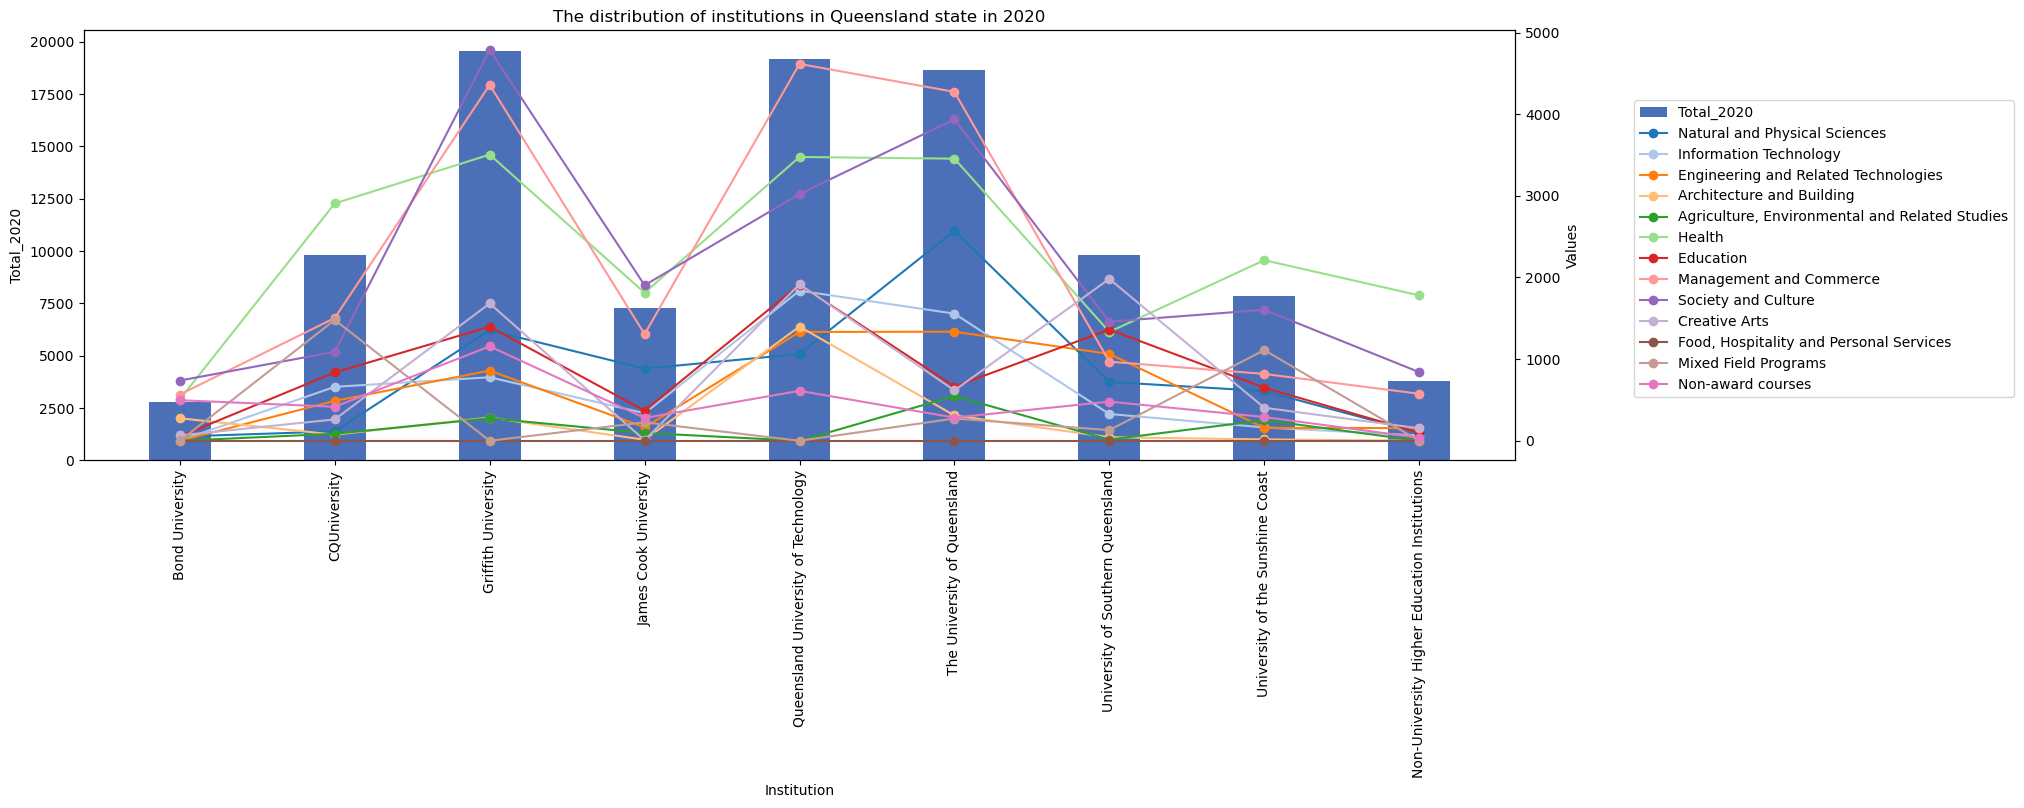

In [67]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(16, 8))

# Bar chart for 'Total_2020'
bars = ax1.bar(institution_QLD['Institution'], institution_QLD['Total_2020'], color='#003399', alpha=0.7, label='Total_2020', width=0.4)
ax1.set_xlabel('Institution')
ax1.set_ylabel('Total_2020', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(institution_QLD['Institution'], rotation=90)

# Line chart for other fields
ax2 = ax1.twinx()
colors = plt.cm.tab20.colors
for idx, column in enumerate(institution_QLD.columns[2:]):  # Exclude 'Institution' and 'Total_2020'
    if column != 'Total_2020':
        ax2.plot(institution_QLD['Institution'], institution_QLD[column], label=column, color=colors[idx % len(colors)], marker='o')

ax2.set_ylabel('Values')
ax2.tick_params(axis='y')

fig.tight_layout()

# Legend
fig.legend(loc='upper left', bbox_to_anchor=(1.02, 0.9))

# Title
plt.title('The distribution of institutions in Queensland state in 2020')

plt.show()

<h3>Overall Insights:</h3>
<ul>
    <li> Management and Commerce (Light Orange) has the highest enrollments across most universities, especially prominent in The University of Queensland, Queensland University of Technology and Griffith University.
    <li> Society and Culture (Purple) is another major field, showing high enrollments in the highest at Griffith University, then Queensland University of Technology and Queensland University of Technology.
    <li> Health (Green) is among the top three fields, especially in Griffith University, The University of Queensland, Queensland University of Technology and CQUniversity.
    <li> Education (Red) also has notable enrollments across several universities, with significant numbers in Griffith University, then Queensland University of Technology and Queensland University of Technology.
    <li> Fields like Information Technology (Light Blue) and Natural and Physical Sciences (Blue) have steady enrollments, with peaks at specific institutions such as Queensland University of Technology and The University of Queensland.
        

# V. PREDICTION


In [69]:
predict_data = pd.read_excel('predict.xlsx')

In [70]:
predict_data 

,Year,Commecing total,All overseas
0,2003,100796,210397
1,2004,107142,228555
2,2005,106961,239495
3,2006,111463,250794
4,2007,126709,273099
5,2008,141131,294163
6,2009,154569,320970
7,2010,151546,335273
8,2011,145064,332577
9,2012,139452,323612


## 5.1 Commencing international student visa in Australia

In [71]:

#define x and y for commencing
x = np.array(predict_data['Year'])
x=x.reshape(-1,1)
y =np.array(predict_data['Commecing total'])

model = LinearRegression()

model.fit(x,y)

model.coef_

model.intercept_

y_pred = model.predict(x)
y_pred

array([104389.01428571, 109951.13909774, 115513.26390977, 121075.38872181,
       126637.51353383, 132199.63834586, 137761.76315789, 143323.88796992,
       148886.01278196, 154448.13759398, 160010.26240601, 165572.38721805,
       171134.51203007, 176696.63684211, 182258.76165413, 187820.88646617,
       193383.0112782 , 198945.13609022, 204507.26090226, 210069.38571429])

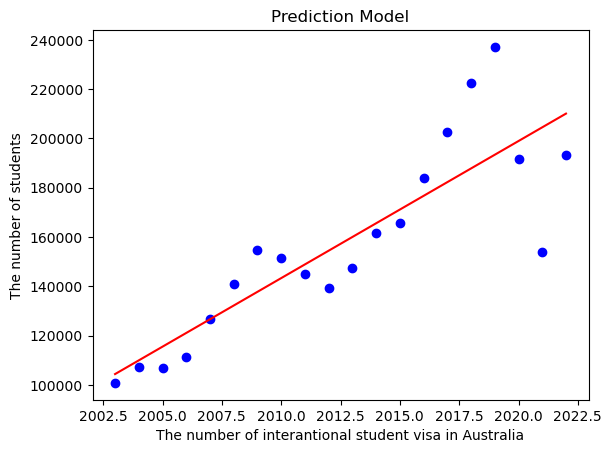

In [72]:
#Visualization
plt.scatter(x,y, color ='blue')
plt.plot(x,y_pred,color = 'red')
plt.title('Prediction Model')
plt.xlabel('The number of interantional student visa in Australia')
plt.ylabel('The number of students')
plt.show()

In [73]:
mse = mean_squared_error(y,y_pred)
print(mse)

376483150.9420274


In [74]:
r2 = r2_score (y,y_pred)
print(r2)

0.7320683285845273


<p> The R² score is 0.732, which means that approximately 73.2% of the variance in the number of students can be explained by the number of international student visas. This indicates a relatively good fit of the model to the data. <p>

In [75]:
model.predict(([[2025]]))

array([226755.76015037])

<p> The model predicts the number of students for the year 2025. The prediction value is approximately 226,755.76.